# MACHINE LEARNING MODELS EXPLAINED


A foreword:

The goal of this notebook is to explain the the _why_ when creating Machine Learning models. Too often the books I read, the youtube videos I watched, or the questions I asked Chatgpt would simply retiterate the definitions and equations to define all things associated with creating machine learning models. Imagine a 4 year old that memorized "5+5 = 10", the child will give the answer "10" when you ask him/her "What's 5+5?" but the child doesn't actually _understand_ what the answer means - that's how I felt when in the transition phase when creating my first ML models after reviewing the theory behind it.

Here are common scenarios when using machine learning models for the first time, regardless of experience level:

- _"I literally copy and pasted the exact code from Github/Stackoverflow/MyfavoriteMachineLearningBook and simply used my own data. Why am I getting error messages?"_ (Then you later find out that it's because you need to transform the data)


- _"What are all these hyperparameters? These weren't stated in the book/article/blog that I read about Support Vector Machines and the sklearn documention simply states the definitions and what they do but NO online resources actually state the real world value of each parameter"_ (Then you later find out that some parameters are useless, some help computational speed and others are actually critical for fitting the data).


- _"I read an entire chapter on methods to undersample/oversample. What is the actual value of these methods and when will I ever need to use this in the real world?"_ (You later find out it's essential for improvement of fitting the model).


This notebook is my best attempt to answer those questions by providing a curation of notes, pictures and codes that I've collected in various subjects in the realm of machine learning. This notebook will always be 'unfinished' as it will constantly be updated with new notes that I find on existing subjects or updated with new models.

# 1 - Feature Engineering

It is very important to transform/munipulate data before it is fit to the desired machine learning model. You will often find that error messages will occur when trying to fit ML models or get poor predictions simply because the data hasn't been preprocessed/transformed/manipulated.

This section outlines various methods and purposes.

## 1A - Transforming category variables to binary variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("C:\\Users\\") #Insert file path
import random

Below is the original data. See how this original data compares to after it has been transformed using various methods.

In [89]:
loan_data = pd.read_csv("\\loan_data.csv")
loan_data = loan_data[['status', 'annual_inc', 'revol_util']]
loan_cat = loan_data['status']
print(loan_data.shape)
loan_data.head(3)

(45342, 3)


status  annual_inc  revol_util
0  Charged Off       30000         9.4
1  Charged Off       40000        32.6
2  Charged Off       15000        36.5

### METHOD 1 - get_dummies (PREFERRED METHOD)

The 'status' column has three categories ['charged off', 'default', 'fully paid']. 

Two modifications to this data may be required before ML modeling:

1. Each category should be represented by a numerical value. For Example, if 'charged off' = 1 'default' = 2, 'fully paid' = 3 then any row in the 'status' column which a numerical value 3 means that they are in the 'fully paid' category.


2. Features such as ['Red','Blue','Green'] do not have any inherent/implied order. If you assign numerical values 1,2,3 to represent each category then often the ML model will assume 'green'(3) is closer to 'Blue'(2) than it is to 'red'(1). In reality, there is ordinal value with values like these compared to something that is ['cold', 'warm', 'hot'] or ['short', 'average', 'tall'] which have implied ordinal value. To resolve this issue, a new column must be make into each category and the numerical value is binary (0 = False, 1 = 1 True)
    

In [88]:
pd.get_dummies(loan_data).head(3)
#pd.get_dummies(loan_data, drop_first=True) #<--In theory, always drop the first to avoid Multicollinearity

annual_inc  revol_util  status_Charged Off  status_Default  \
0       30000         9.4                   1               0   
1       40000        32.6                   1               0   
2       15000        36.5                   1               0   

   status_Fully Paid  
0                  0  
1                  0  
2                  0

### METHOD 2 - OneHotEncoder (ALTERNATIVE TO GET_DUMMIES)

__NOTE:__ input categories must be separated in a DataFrame format to transform using OneHotEncoder. 

In [90]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False, dtype = int)
loan_cat = loan_data['status'] #This method requires the catagory columns to be separated
loan_cat = pd.DataFrame(loan_cat)
loan_data[['Charged Off', 'Default', 'Fully Paid']] = ohe.fit_transform(loan_cat)
loan_data.head(3)

status  annual_inc  revol_util  Charged Off  Default  Fully Paid
0  Charged Off       30000         9.4            1        0           0
1  Charged Off       40000        32.6            1        0           0
2  Charged Off       15000        36.5            1        0           0

### Method 3 - LabelEncoder

Unlike the get_dummies or OneHotEncoder method, the label encoder will assign a numerical value for each category and keep them in the same column.

I've found that this method is usually only valuable for unsupervised learning (there are no predictions) or the column is actually the class/target that needs to be predicted. 

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan_data['status_le'] = le.fit_transform(loan_data['status'])
loan_data.tail(3)

status  annual_inc  revol_util  Charged Off  Default  Fully Paid  \
45339  Fully Paid       20000        73.0            0        0           1   
45340  Fully Paid       48000        32.4            0        0           1   
45341  Fully Paid      100000        91.6            0        0           1   

       status_le  
45339          2  
45340          2  
45341          2

### Method 4 - OrdinalEncoder

This method creates a unique ranked numerical value for each category that has an implied order of importance. For example ['low', 'med', 'high] or ['cold', 'warm', 'hot]

__NOTE:__ Input must be in a DataFrame format

In [92]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
loan_cat = loan_data['status'] #This method requires the catagory columns to be separated
loan_cat = pd.DataFrame(loan_cat)
loan_data['status_OE'] = oe.fit_transform(loan_cat)
loan_data.head(3)

status  annual_inc  revol_util  Charged Off  Default  Fully Paid  \
0  Charged Off       30000         9.4            1        0           0   
1  Charged Off       40000        32.6            1        0           0   
2  Charged Off       15000        36.5            1        0           0   

   status_le  status_OE  
0          0        0.0  
1          0        0.0  
2          0        0.0

## 1B - Data Transformation

Below is the the original data. Compare to how the transformed data in this section compares to the original.

In [93]:
loan_data = pd.read_csv("\\loan_data.csv")
loan_data = loan_data[['status', 'annual_inc', 'revol_util']] #Only int/float columns
loan_data.head(3)

status  annual_inc  revol_util
0  Charged Off       30000         9.4
1  Charged Off       40000        32.6
2  Charged Off       15000        36.5

### StandardScaler

Variance differs for each column. For example, the variance of salary per employee will be significantly wider than hours-worked per employee. This can be problematic for machine learning because the hours-worked variance will be so dominated by salary that it will be difficult to understand if hours-worked is an important feature/variable.

StandardScaler resolves this issue as it normalizes (standardizes) the data so that mean=0 and std=1

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
loan_float = loan_data[['annual_inc', 'revol_util']]
loan_data[['annual_inc_SS', 'revol_util_SS']] = scaler.fit_transform(loan_float)
loan_data.head(3)

status  annual_inc  revol_util  annual_inc_MM  revol_util_MM  \
0  Charged Off       30000         9.4       0.003922       0.073380   
1  Charged Off       40000        32.6       0.005322       0.254489   
2  Charged Off       15000        36.5       0.001821       0.284934   

   annual_inc_SS  revol_util_SS  
0      -0.679459      -1.834519  
1      -0.501645      -0.922210  
2      -0.946181      -0.768848

__NOTE:__ We can now see the mean = 0 and std = 1

In [96]:
loan_data['annual_inc_SS'].describe()

count    4.534200e+04
mean    -2.131221e-17
std      1.000011e+00
min     -1.177340e+00
25%     -4.660818e-01
50%     -1.460158e-01
75%      2.273945e-01
max      1.257782e+02
Name: annual_inc_SS, dtype: float64

### MinMaxScaler

Absolute values differs for each column. For example, the absolute value of salary per employee will be significantly larger than hours-worked per employee. This can be problematic for machine learning because the hours-worked variance will be so dominated by salary that it will be difficult to understand if hours-worked is an important feature/variable.

MinMaxScaler resolves this issue as Binds the data in between a range of 0 and 1.

In [94]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
loan_float = loan_data[['annual_inc', 'revol_util']]
loan_data[['annual_inc_MM', 'revol_util_MM']] = mmscaler.fit_transform(loan_float)
loan_data.head(3)

status  annual_inc  revol_util  annual_inc_MM  revol_util_MM
0  Charged Off       30000         9.4       0.003922       0.073380
1  Charged Off       40000        32.6       0.005322       0.254489
2  Charged Off       15000        36.5       0.001821       0.284934

It can be seen that all values are now between 0 and 1

In [97]:
loan_data['annual_inc_MM'].describe()

count    45342.000000
mean         0.009274
std          0.007877
min          0.000000
25%          0.005602
50%          0.008124
75%          0.011065
max          1.000000
Name: annual_inc_MM, dtype: float64

## 1C - Undersampling/OverSampling

Data often has targets/classes that are imbalanced. For example, credit card purchases identified as 'fraudulent' will be substantially less frequent than purchases identified as 'authentic'. This can be problematic for some ML models because the model will consider the 'fraudulent' class as minute/unimportant when in fact that is not true.

Depending on the dataset you may in need undersample the majority class or oversample the minority class. There is no 'one size fits all' answer on which approach to use but in general: undersample if you have relatively large dataset and oversample if you have a small dataset.

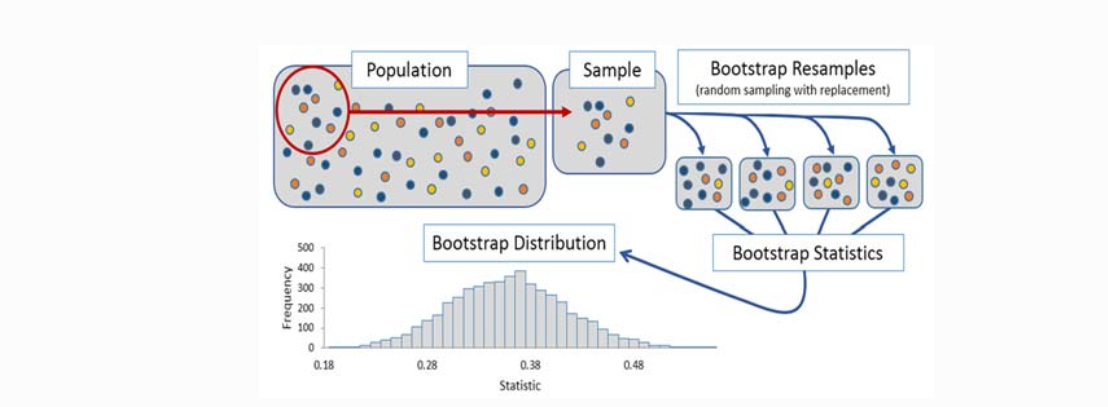

### The 'Old School' Undersampling and Oversampling Method

In [ ]:
# Separate majority and minority classes
df_majority = df[df.iloc[:,4608]==1]
df_minority = df[df.iloc[:,4608]==0]

We can downsample the majority class, upsample the minority class or we can do both. You should try them to find which one is the most suitable for you. One other hyperparameter that you can tune is n_samples which is the number of samples that you resample.

__NOTE:__ the below code is for demonstration purposes only. 

It uses `resample()` with replace=False to downsample. The False value ensures that each random sample that is pulled is not being taken more than once.

It uses `resample()` with replace=True to downsample. The True value bootstraps the minority class.

In [ ]:
# Separate majority and minority classes
df_majority = df[df.iloc[:,4608]==1]
df_minority = df[df.iloc[:,4608]==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=1000)
#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=1000)
# Combine minority class with downsampled majority class
df_up_down_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

In [143]:
#Lastly display new class counts with:

In [142]:
#df_downsampled.prediction.value_counts()

### The Oversampling SMOTE and ADASYN method

`SMOTE()` generates synthetic data similar to K-Nearest Neighbors; it finds similar features and creates synethic data to mimic those features. Below is an extract of how to code it.

`ADASYN()` is dangerously similar to SMOTE. The difference is that that ADASYN is that instances in regions when there is a higher imbalance of ratios in features are considered more important thus more synthetic instances are generated for them.

__NOTE:__ the below code is for demonstration purposes only and will not run if executed.

In [106]:
from imblearn.over_sampling import SMOTE, ADASYN

In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print('percentage of loans in default (SMOTE resampled): ', 
      100 * np.mean(y_resampled == 'default'))

full_model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
full_model.fit(X_resampled, y_resampled)
print('percentage of loans predicted to default (SMOTE): ', 
      100 * np.mean(full_model.predict(X) == 'default'))


X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print('percentage of loans in default (ADASYN resampled): ', 
      100 * np.mean(y_resampled == 'default'))

full_model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
full_model.fit(X_resampled, y_resampled)

print('percentage of loans predicted to default (ADASYN): ' +  str(100 * np.mean(full_model.predict(X) == 'default')))

## 1D - Missing Values

There are a couple ways to handle missing values:

- Simply delete all rows containing missing data. This is the easiest approach but it only works when you have a large dataset and you believe the dataset is large enough to make accurate predictions. This will not work if missing values is systematic across multiple features since it will delete too much data.

- If a feature has continous values with missing data. The best options is to use the `corr()` to find the features that have the highest correlation and use regression to predict the value.

- If the feature is categorical, than an approach is to create use KNearestNeighbors to predict the missing values in that column. That can be achieved by modeling KNearestNeighbors and setting X to all the other features and setting the feature with missing values as y (the target).

## 1E - Principal Components Analysis

PCA is technically considered an unsupervised learning technique used to understand features that are important but arguably it's main application use is for dimension reduction during data preprocessing.

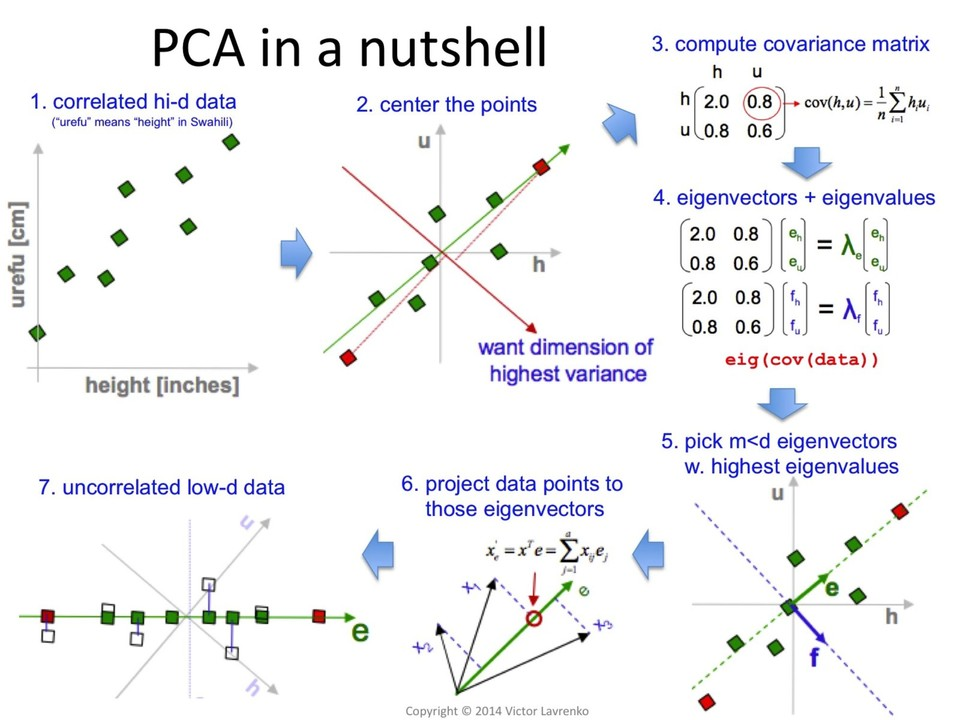
__SUMMARY:__

- Too many features in your dataset can be problematic, a problem referred to as the curse of dimensionality. Essentially, you'll need more data, risk overfitting, and potentially run into computation or storage problems. PCA performs dimensionality reduction can help you avoid these problems. For example, PCA will reduce a dataset with 10 features to only 3 features while maintaining the integrity for model predictions.

- Dimensionality reduction reduces storage, makes machine learning algorithms computationally efficient and helps remove redundant features and noise.


- PCA helps understand the relationship between datapoints and identify which are the most important features.

__CONS:__ 

- Does not perform well when there are nonlinear relationships

- When multiple features are reduced to a principal component, it makes it difficult to readily interpret the relationship between model predictions and the original features.

__HYPERPARAMETERS:__

- `n_components` The number of components that you want to keep.


- `n_copy` Results will used copied data and fit will not change is original database is altered.


- `whiten` indicates whether the principal components should be scaled to have unit variance. The purpose of whitening is to decorrelate the components and make them more amenable for further processing or analysis. It can be useful when the variances of the original features differ significantly, and you want to ensure that the transformed components are equally weighted.


- `svd_solver` PCA will find which combination of features will make the best PC's, this can be computationally expensive if there are a large number of both features and samples because PCA will plot every combination of features and data points to find the optimal PC's. This hyperparameter is used to make the calculation more efficent for data processing. The solver used to find the principal components. 'Full' is the most efficient but will be slow for large datasets, 'Arpack' is more memory efficent and is slower than 'Randomized' but faster than 'Full', 'Randomized' is a fast approximation in the first few vectors, it is useful when there is a substantial quantity of features. 



- `tol`- Tolerance to how accurate the values are to finding the principal compoennts.


- `iterated_power` Number of iterations (aka attempts) to find the optimal princicipal components.


- `random_state`  The randomized seed.

### PCA Application Example #1 - DImensionality Reduction for Preprocessing

Refer to the the intial dataset:

In [98]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
pd.set_option('display.max_columns', None)
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33            184.6      2019.0            0.1622   
1         24.99          23.41            158.8      1956.0            0.1238   
2         23.57          25.53            152.5      1709.0            0.1444   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758

There are 30 features.

In [129]:
df.shape

(569, 30)

Let's standardize the data.

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [131]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [132]:
x_pca=pca.transform(scaled_data)

PCA has reduced the quantity of features from 30 to 2 as per below. You would then use this PCA transformed data for ML models. The computational speed will be faster since non-important features have been filtered with PCA and it may even help with increased accuracy.

In [133]:
print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


Below is a visual of the PCA.

Text(0, 0.5, 'Second principle component')

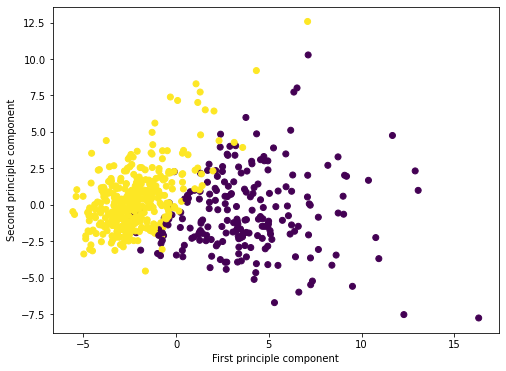

In [613]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

### PCA Application Example #2 - Feature Importance

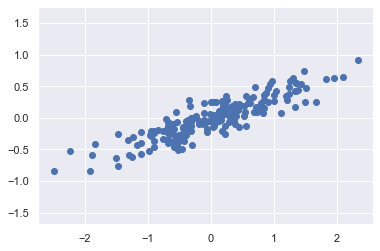

In [134]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [136]:
X = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
X.head(3)

Feature1  Feature2
0 -0.625302 -0.170064
1  0.960695  0.590901
2 -0.598543 -0.402593

`pca.components_` has the following format: Each row is a Principal Component (PC) and each column within that row are the importance with the features.

Thus, by looking at the PC1 (First Principal Component) which is the first row: [0.94446029 0.32862557] we can conclude that Feature 1 is the most important.

By looking at the PC2 (Second Principal Component), which the second row: [0.32862557 0.94446029] we conclude that the Feature 2 is the most important.


In [138]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(abs(pca.components_))

[[0.94446029 0.32862557]
 [0.32862557 0.94446029]]


The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors. `pca.explained_variance_ratio` states that PC1 alone will explain 98% of the data.

In [139]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

### Finding the Optimal Number of Components

The dataset below consists of 64 total components which may cause problems from multicolinearity and reduce model accuracy or it may have slow computational speed when the code is put into production.

The below curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.:

In [140]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)


(1797, 64)
(1797, 2)


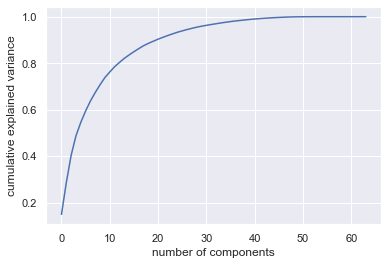

In [141]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# 2 - Model Assessment & Validation

Refer to the original dataset below:

In [100]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [101]:
X = digits.data
y = digits.target

### Train Test Split

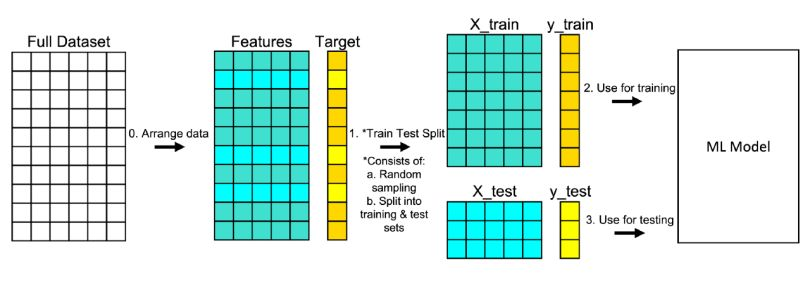

Train test split allows us to see how models perform on 'unseen' data. If the model predicts the same data that it was used to fit, then one will receive an accuracy that is 'too good to be true'.

In [103]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

## Model Accuracy

### Cross Validation Score

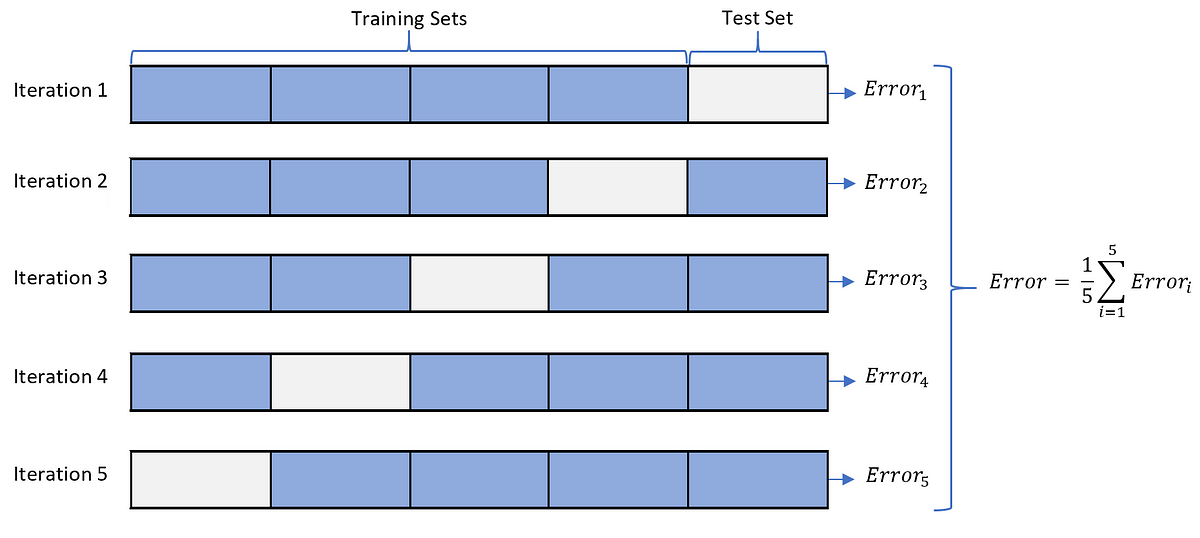

In [104]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.78055556, 0.78333333, 0.79387187, 0.8718663 , 0.80501393])

### Accuracy Score

Works only for classification models

In [105]:
from sklearn.metrics import accuracy_score

accuracy_score(y_model, ytest)

0.8333333333333334

### Confusion Matrix

Confusion Matrices allow us to know the  Type 1 and Type 2 error.

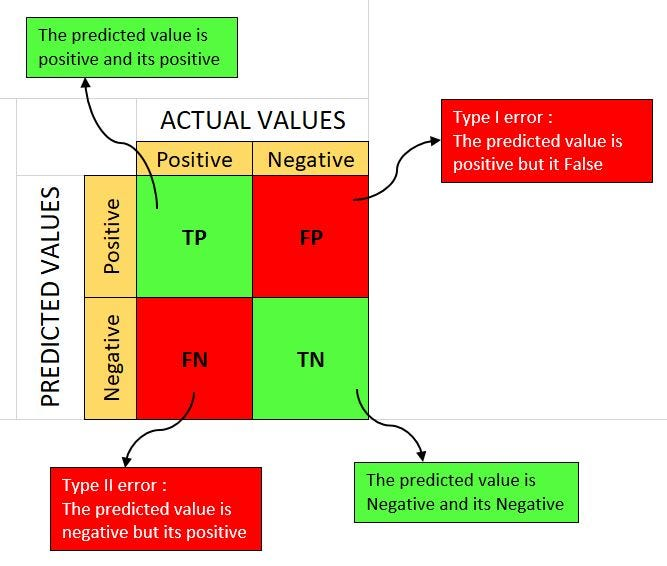

<AxesSubplot:>

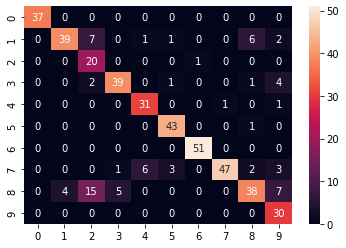

In [1326]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_model, ytest)

sns.heatmap(cm, annot=True)

## Selecting the Best Model - Bias/Variance tradeoff

### Validation Curve

Models that are underfit vs overfit:
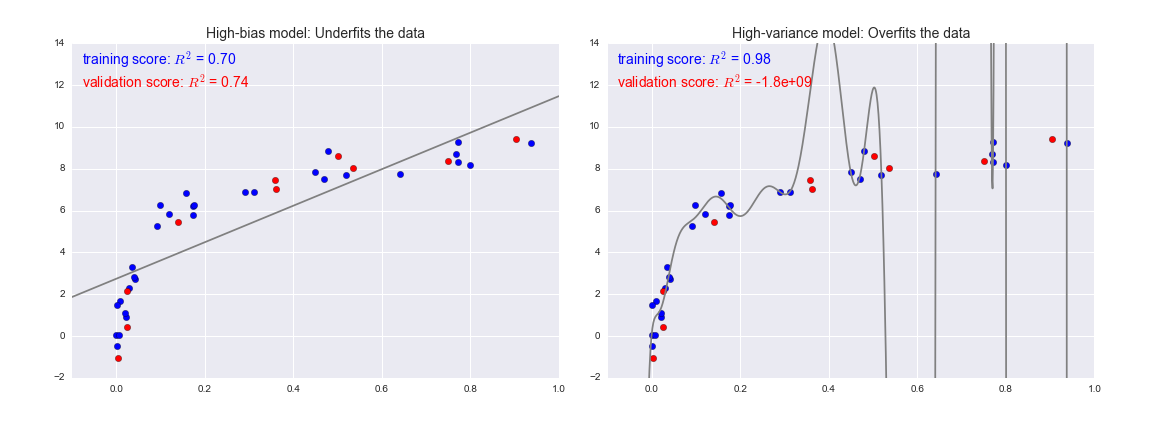

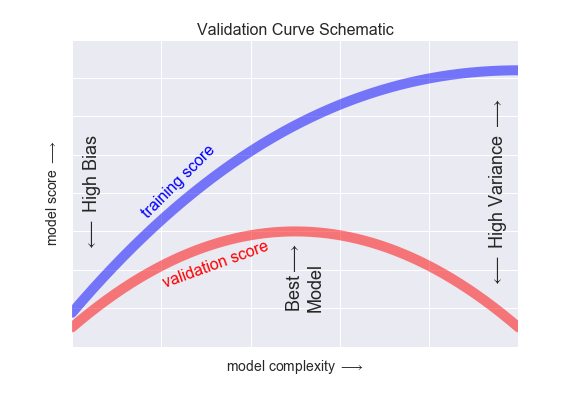

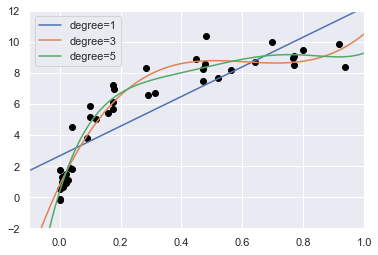

In [145]:
#Create Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

#Creates artifical data
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

#Visualize the data to see how the polynomial fits of several degress:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

The knob controlling model complexity in this case is the degree of the polynomial, which can be any non-negative integer. A useful question to answer is this: what degree of polynomial provides a suitable trade-off between bias (under-fitting) and variance (over-fitting)?

We can make progress in this by visualizing the validation curve for this particular data and model; this can be done straightforwardly using the validation_curve convenience routine provided by Scikit-Learn. Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validation score across the range:

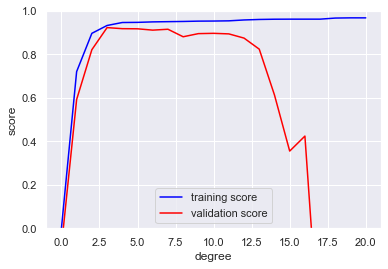

In [149]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name = 'polynomialfeatures__degree', param_range = degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

This shows precisely the qualitative behavior we expect: the training score is everywhere higher than the validation score; the training score is monotonically improving with increased model complexity; and the validation score reaches a maximum before dropping off as the model becomes over-fit.

From the validation curve, we can read-off that the optimal trade-off between bias and variance is found for a third-order polynomial; we can compute and display this fit over the original data as follows:

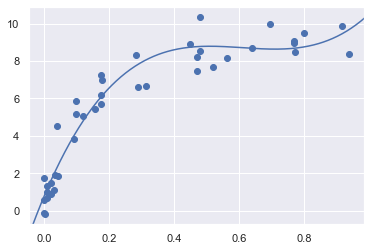

In [150]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Learning Curves

The general behavior we would expect from a learning curve is this:

A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.
A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.
With these features in mind, we would expect a learning curve to look qualitatively like that shown in the following figure:

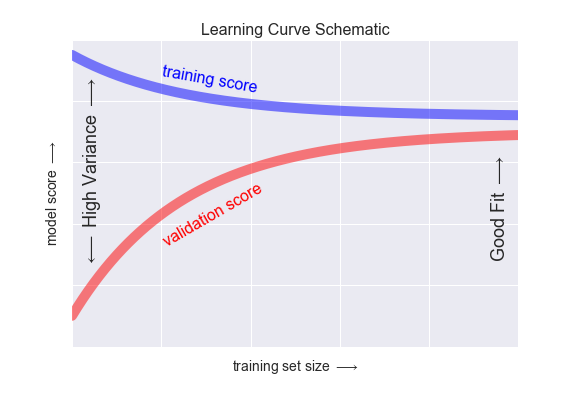

The notable feature of the learning curve is the convergence to a particular score as the number of training samples grows. In particular, once you have enough points that a particular model has converged, adding more training data will not help you! The only way to increase model performance in this case is to use another (often more complex) model.

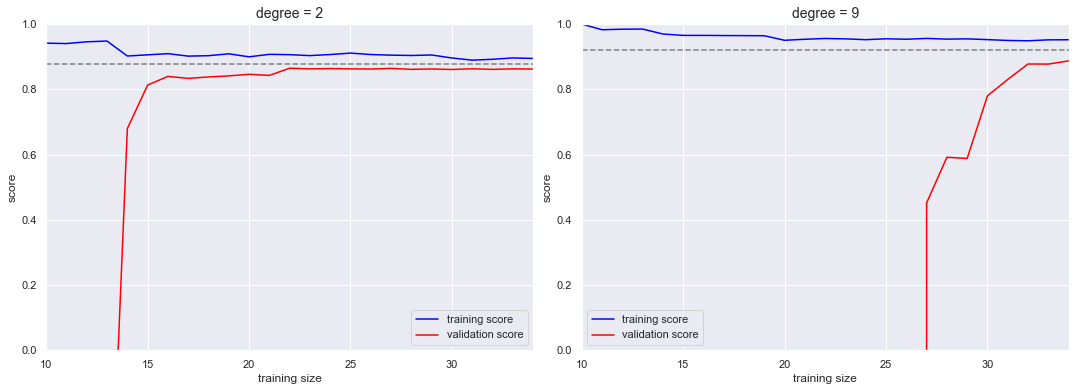

In [152]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

## ROC Curve

The ROC curve shows the trade-off between sensitivity (or TPR) and False Positive Rate (1 – Specificity). Classifiers that give curves closer to the top-left corner indicate a better performance.

Classifiers such as Naive Bayes or Logistic Regression provide probabilities of each classification. Sometimes we want to modify the threshold to include more false positives, for example, imagine creating the first covid test during the 2020 pandemic. You may want to increase the false positives if that means it increases the amount of true positives in order to prevent further infection.

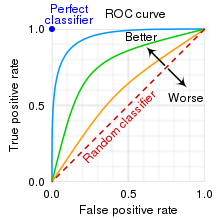
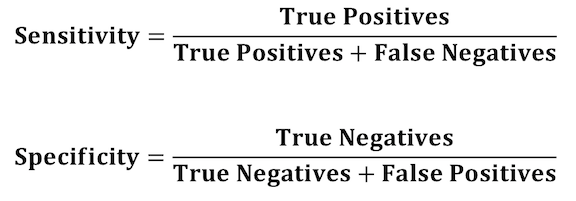

In [238]:
from sklearn.linear_model import LogisticRegression

loan_data = pd.read_csv("\\loan_data.csv")

# convert to categorical
loan_data.outcome = loan_data.outcome.astype('category')
loan_data.outcome.cat.reorder_categories(['paid off', 'default'])
loan_data.purpose_ = loan_data.purpose_.astype('category')
loan_data.home_ = loan_data.home_.astype('category')
loan_data.emp_len_ = loan_data.emp_len_.astype('category')

predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_', 
              'borrower_score']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', 
                   drop_first=True, dtype=int)
y = loan_data[outcome] # .cat.categories


"""penalty and C are used to prevent overfitting. We set pentalty and C to large values to prevent regularization"""
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X.columns)

intercept  -1.638088683407208
classes ['default' 'paid off']


coeff
payment_inc_ratio  -0.079728
borrower_score      4.611037
debt_consolidation -0.249342
home_improvement   -0.407614
major_purchase     -0.229376
medical            -0.510087
other              -0.620534
small_business     -1.215662
OWN                -0.048453
RENT               -0.157355
 > 1 Year           0.357464

In [239]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
logit_reg.fit(Xtrain, ytrain)

LogisticRegression(C=1e+42, solver='liblinear')

__NOTE:__ 'paid off' is the numerical category of 1

In [240]:
logit_reg.predict_proba(Xtest)

array([[0.4416985 , 0.5583015 ],
       [0.34364069, 0.65635931],
       [0.32544627, 0.67455373],
       ...,
       [0.27901722, 0.72098278],
       [0.51469679, 0.48530321],
       [0.58711419, 0.41288581]])

In [241]:
logit_reg.predict_proba(Xtest)[:,1]

array([0.5583015 , 0.65635931, 0.67455373, ..., 0.72098278, 0.48530321,
       0.41288581])

In [243]:
logit_reg.predict(Xtest)

array(['paid off', 'paid off', 'paid off', ..., 'paid off', 'default',
       'default'], dtype=object)

In [245]:
classificationSummary(ytest, logit_reg.predict(Xtest), class_names=logit_reg.classes_)

Confusion Matrix (Accuracy 0.6379)

         Prediction
  Actual  default paid off
 default     3598     2062
paid off     2043     3633


__NOTE:__ We use the 'default' values in the `logit_reg.predict_proba(Xtest)[:,0]` because it represents the True positives in the upper lefthand corner of the confusion matrix.

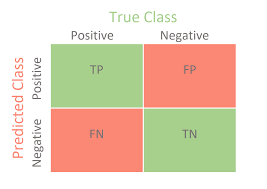

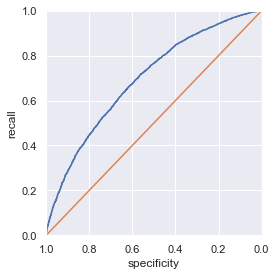

In [263]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(np.array(ytest), logit_reg.predict_proba(Xtest)[:,0], 
                                 pos_label='default')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')


plt.tight_layout()
plt.show()

[0.         0.33333333 0.66666667 0.66666667 1.         1.        ]
[0.  0.  0.  0.5 0.5 1. ]
[2.   1.   0.75 0.09 0.05 0.  ]
0.30583709662156944
Threshold value is: 0.75


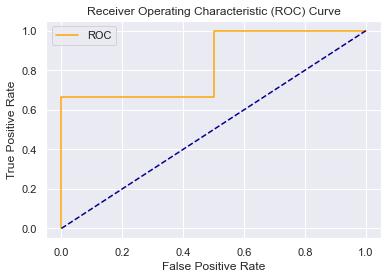

In [267]:
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

## Model Parameter Selection

### GridSearchCV

This will find the best parameters for your model. Most models have parameters that need to be fine tuned in order to improve performance. It can be daunting to manually observe the performance of every combination of parameters. Luckily, GridSearchCV can help us.

Review the documentation for the desired model to know the parameters. Create a `param_grid` that will state the desired parameters and ranges you would like to test.

GridSearchCSV will take this information and select the best parameter inputs

In [269]:
loan_data =  pd.read_csv("\\loan_data.csv")
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)


predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

In [270]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(loan_data.loc[1:, predictors], loan_data.loc[1:, outcome])

In [1013]:
loan_data.loc[1:, predictors]

payment_inc_ratio    dti  revol_bal  revol_util
1                4.57170   5.55       5210        32.6
2                9.71600  18.08       9279        36.5
3               12.21520  10.08      10452        91.7
4                3.90888   7.06      11997        55.5
5                8.01977  13.22      32135        90.3
...                  ...    ...        ...         ...
45337            4.57850  18.97       9725        58.2
45338            3.20333  13.24       4925        40.7
45339            9.98460   7.95       6574        73.0
45340            6.45250  26.91      10303        32.4
45341           11.87150   7.82      16676        91.6

[45341 rows x 4 columns]

In [271]:
loan_data.loc[1:, outcome]

1         default
2         default
3         default
4         default
5         default
           ...   
45337    paid off
45338    paid off
45339    paid off
45340    paid off
45341    paid off
Name: outcome, Length: 45341, dtype: category
Categories (2, object): ['paid off' < 'default']

__WARNING!__ The below code requires a lot of computational power. May take five mintues to run.

__NOTE:__
The parmeters in param_grid are the parameters listed in the model's documentation. There will be an error if this param_grid lists a parameter not shown in the model's documentation.

In [273]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [5, 10, 15],
             'weights': ['uniform', 'distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=7)

grid.fit(X,y)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']})

The model is fit and will provide the best parameters.

In [274]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}

Plug in the best parmeters.

Be careful of being overfit

In [279]:
model = KNeighborsClassifier(algorithm='auto', n_neighbors=15, weights='distance')
model.fit(X,y)
classificationSummary(y, model.predict(X), class_names=model.classes_ )

Confusion Matrix (Accuracy 1.0000)

         Prediction
  Actual  default paid off
 default    22670        0
paid off        0    22671


Shortcut - The same end result can be achieved by using the 'grid' that was used to do the gridsearch.

In [994]:
classificationSummary(y, grid.predict(X), class_names=knn.classes_ )

Confusion Matrix (Accuracy 1.0000)

         Prediction
  Actual  default paid off
 default    22670        0
paid off        0    22671


The data was overfit so let's Repeat the same fit but with train_test_split

In [1017]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [5, 10, 15],
             'weights': ['uniform', 'distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=7)

grid.fit(Xtrain, ytrain)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']})

In [1018]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}

In [1019]:
classificationSummary(ytest, grid.predict(Xtest), class_names=knn.classes_ )

Confusion Matrix (Accuracy 0.5445)

         Prediction
  Actual  default paid off
 default     3002     2666
paid off     2498     3170


The Grid paramaters match the results of manually entering the parameters.

In [1025]:
from sklearn.neighbors import KNeighborsClassifier
from dmba import classificationSummary

KNN_model = KNeighborsClassifier(n_neighbors=15, algorithm='auto', weights='distance')
KNN_model.fit(Xtrain,ytrain)

classificationSummary(ytest, KNN_model.predict(Xtest), class_names=knn.classes_)

Confusion Matrix (Accuracy 0.5445)

         Prediction
  Actual  default paid off
 default     3002     2666
paid off     2498     3170


The results are still better than the standard KNN results. NOTE that train_test_split was used so the model isn't over fit thus it has more poor results.

In [1028]:
from sklearn.neighbors import KNeighborsClassifier
from dmba import classificationSummary

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(Xtrain,ytrain)

classificationSummary(ytest, KNN_model.predict(Xtest), class_names=knn.classes_)

Confusion Matrix (Accuracy 0.5348)

         Prediction
  Actual  default paid off
 default     2955     2713
paid off     2561     3107


# Making a Pipeline

It can be daunting to do PCA or onehotcode the dataset before fitting it to a ML model. Creating a pipeline allows you do it all in one shot.

This is how a normal KNN model would work BEFORE Standardization.

In [268]:
"""BEFORE STANDARDIZATION"""
loan_data =  pd.read_csv("\\loan_data.csv")
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)


predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

In [1056]:
X.head(3)

payment_inc_ratio    dti  revol_bal  revol_util
1             4.5717   5.55       5210        32.6
2             9.7160  18.08       9279        36.5
3            12.2152  10.08      10452        91.7

In [1058]:
X.describe()

payment_inc_ratio           dti     revol_bal    revol_util
count       45341.000000  45341.000000  4.534100e+04  45341.000000
mean            8.032350     16.134065  1.485774e+04     56.052829
std             4.263999      7.594632  2.008267e+04     25.429612
min             0.048892      0.000000  0.000000e+00      0.000000
25%             4.671670     10.460000  5.657000e+03     37.900000
50%             7.499380     16.020000  1.076600e+04     58.400000
75%            10.940900     21.590000  1.861400e+04     76.400000
max            43.545600     38.860000  1.743266e+06    128.100000

In [1072]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

classificationSummary(y, knn.predict(X), 
                      class_names=knn.classes_)

Confusion Matrix (Accuracy 0.7029)

         Prediction
  Actual  default paid off
 default    15815     6855
paid off     6618    16053


Now, let's standardize the data and re-run the KNN model to compare the results.

In [1070]:
"""AFTER STANDARDIZATION"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_std = scaler.fit_transform(X)
newloan_std = scaler.transform(newloan)

knn_post_std = KNeighborsClassifier(n_neighbors=5)
knn_post_std.fit(X_std, y)

#nbrs = knn.kneighbors(newloan_std)
#print(X.iloc[nbrs[1][0], :])
#loan_data[['payment_inc_ratio_SS', 'dti_SS', 'revol_bal_SS', 'revol_util_SS']] = X_std
loan_data_SS = pd.DataFrame(X_std, columns = ['payment_inc_ratio_SS', 'dti_SS', 'revol_bal_SS', 'revol_util_SS'])
loan_data_SS.describe() #NOTE THE MEAN =0 and STD=1

payment_inc_ratio_SS        dti_SS  revol_bal_SS  revol_util_SS
count          4.534100e+04  4.534100e+04  4.534100e+04   4.534100e+04
mean           3.410028e-16 -6.519172e-17 -1.990228e-17   7.020647e-17
std            1.000011e+00  1.000011e+00  1.000011e+00   1.000011e+00
min           -1.872314e+00 -2.124427e+00 -7.398371e-01  -2.204259e+00
25%           -7.881608e-01 -7.471234e-01 -4.581483e-01  -7.138539e-01
50%           -1.249943e-01 -1.501935e-02 -2.037470e-01   9.230173e-02
75%            6.821255e-01  7.184015e-01  1.870421e-01   8.001457e-01
max            8.328717e+00  2.992401e+00  8.606563e+01   2.833231e+00

In [1071]:
classificationSummary(y, knn.predict(X_std), 
                      class_names=knn.classes_)

Confusion Matrix (Accuracy 0.7095)

         Prediction
  Actual  default paid off
 default    16098     6572
paid off     6601    16070


Note the changes in confusion matrix before and after standardization.

Below is a pipeline that achieves the exact same results as above without having to standardize the data separately.

In [1073]:
"""COMBINING STANDARDSCALER AND MODEL INTO A SINGLE PIPELINE"""

from sklearn.pipeline import make_pipeline

KNN_Pipeline = make_pipeline(StandardScaler(),
                           KNeighborsClassifier(n_neighbors=5))

KNN_Pipeline.fit(X,y)

classificationSummary(y, KNN_Pipeline.predict(X), class_names=knn.classes_ ) #NOTE the Confusion matrix matches 'After Standardization'

Confusion Matrix (Accuracy 0.7095)

         Prediction
  Actual  default paid off
 default    16098     6572
paid off     6601    16070


NOTE: You can see that removing the StandardScaler() from the pipeline returns the fit to the original (before standardization) results.

In [1074]:
"""COMBINING STANDARDSCALER AND MODEL INTO A SINGLE PIPELINE"""
KNN_Pipeline = make_pipeline(KNeighborsClassifier(n_neighbors=5))

KNN_Pipeline.fit(X,y)

classificationSummary(y, KNN_Pipeline.predict(X), class_names=knn.classes_ )

Confusion Matrix (Accuracy 0.7029)

         Prediction
  Actual  default paid off
 default    15815     6855
paid off     6618    16053


# Naive Bayes Model

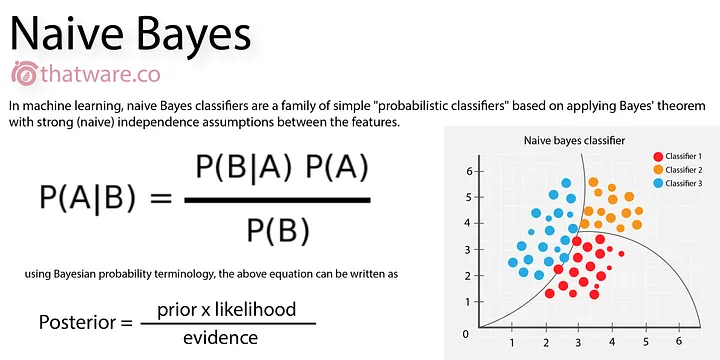

Multinomial Naive Bayes (MultinomialNB) and Categorical Naive Bayes (CategoricalNB) are both variants of the Naive Bayes classifier, but they are designed for different types of data. The choice between them depends on the nature of your features. Let's discuss when to use each:

Multinomial Naive Bayes (MultinomialNB):

Data Type: MultinomialNB is suitable for datasets with discrete features, typically representing counts or frequencies. It is commonly used in text classification problems where the features are often word counts or term frequencies.
Example Applications: Document classification, spam detection, sentiment analysis, or any problem where features represent counts of occurrences.
Categorical Naive Bayes (CategoricalNB):

Data Type: CategoricalNB is designed for datasets with categorical features. Categorical features are discrete and represent categories or labels, but unlike counts, they don't have an inherent order or magnitude.
Example Applications: Customer feedback classification with categorical features like "positive," "neutral," or "negative," topic classification with non-ordinal categories, or any problem where features are categorical.

GaussianNB are for continuous variables


Naive Bayes is simple because there are no hyperparameters since it assumes no interactions between the features. It is the best option for a quick-and-dirty baseline for a classification problem.

Bayes classification relies on the relationship of conditional probabilities.

GaussianNB assumes the data has no covariance between dimensions. We can find this model simply by finding the mean and standard deviation of the points iwhtin each label. 

__PROS:__
- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters.

__FAQ:__

_What if a dataset has both continuous and discrete data?_

There are two options:
    
1. Transform all your data into a categorical representation by computing percentiles for each continuous variables and then binning the continuous variables using the percentiles as bin boundaries. For instance for the height of a person create the following bins: "very small", "small", "regular", "big", "very big" ensuring that each bin contains approximately 20% of the population of your training set. This will make all the variables discrete; use MultinomialNB

    for example:
    
    binnedPopulation = pd.cut(state['Population'], 10, labels=['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten'])
print(binnedPopulation.value_counts())

or

    #A column of name 'Label' is created in DataFrame 
    #Categorizing Age into 4 Categories 
    #Baby/Toddler: (0,3], 0 is excluded & 3 is included 
    #Child: (3,17], 3 is excluded & 17 is included 
    #Adult: (17,63], 17 is excluded & 63 is included 
    #Elderly: (63,99], 63 is excluded & 99 is included 

- df['Label'] = pd.cut(x=df['Age'], bins=[0, 3, 17, 63, 99], labels=['Baby/Toddler', 'Child', 'Adult','Elderly']) 
  

2. Independently fit a gaussian NB model on the continuous part of the data and a multinomial NB model on the categorical part. Then transform all the dataset by taking the class assignment probabilities (with predict_proba method) as new features: np.hstack((multinomial_probas, gaussian_probas)) and then refit a new model (e.g. a new gaussian NB) on the new features. This will make all of the variables continous; use GuassianNB


    You will need the following steps:

- Calculate the probability from the categorical variables (using predict_proba method from BernoulliNB)
- Calculate the probability from the continuous variables (using predict_proba method from GaussianNB)
- Multiply 1. and 2. AND
- Divide by the prior (either from BernoulliNB or from GaussianNB since they are the same) AND THEN
- Divide 4. by the sum (over the classes) of 4. This is the normalisation step.

### GuassianNB

Parameters:

- `var_smoothing` Adjust the var_smoothing parameter based on your specific dataset and the nature of your features. It is often used in situations where you have features with low variance or, in extreme cases, zero variance. Zero is a dangerous number for this model because anything multiplied by zero equals zero which will cause a feature with a zero probability to act as a virus for any computations. An optional parameter that addresses the issue of having features with zero variance. When you have a feature with zero variance, it means that all the values of that feature are the same, and this can cause problems in the computation of the Gaussian probability distribution. The `var_smoothing` parameter is used to overcome this issue by adding a small value to the variances. It essentially adds a specified fraction of the largest variance among all features to the variances of each feature. This helps prevent division by zero in the Gaussian Naive Bayes formula and stabilizes the computation.


- `priors` Adjusting the priors can be useful in situations where you have prior knowledge about the distribution of classes, and you want to incorporate that knowledge into the Naive Bayes model. For Example, you can set the priors to [0.3, 0.7] if you have prior knowledge that that probabilities are 30%/70%. If set to __none__ then the proabiilites will be set based on the training data. This is usually modified if your sure the probabilities of classes/targets in the dataset doesn't accurately reflect the known true population probability.

In [338]:
#import modules
from dmba import classificationSummary
from sklearn.naive_bayes import GaussianNB


model = GaussianNB()

loan_data = pd.read_csv("\\loan_data.csv")
loan_data = loan_data[['annual_inc', 'dti', 'payment_inc_ratio', 'revol_bal', 'revol_util', 'outcome']]

predictors = ['annual_inc', 'dti', 'payment_inc_ratio', 'revol_bal', 'revol_util']
outome = 'outcome'

X = loan_data[predictors]
y = loan_data[outcome]

model.fit(X,y)

classificationSummary(y, model.predict(X))

Confusion Matrix (Accuracy 0.5720)

       Prediction
Actual     0     1
     0 17724  4947
     1 14461  8210


### MultinomialNB

__HYPERPARAMETERS__:

- `alpha` Laplace smoothing (additive smoothing) is employed. This prevents the probabilities from being zero, even if a particular feature-class combination did not occur in the training set. Zero is a dangerous number for this model because anything multiplied by zero equals zero which will cause a feature with a zero probability to act as a virus for any computations. 


- `fit_prior` If fit_prior is set to True (the default), the class prior probabilities are adjusted based on the data during training. In other words, the algorithm estimates the prior probabilities from the class frequencies in the training data. If fit_prior is set to False, the class prior probabilities are not adjusted based on the training data. Instead, you can provide your own prior probabilities using the class_prior parameter.


- `class_prior` Documentation poorly specifies the difference between this an 'fit_prior'

In [832]:
from sklearn.datasets import fetch_20newsgroups

In [833]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [836]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [837]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [839]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

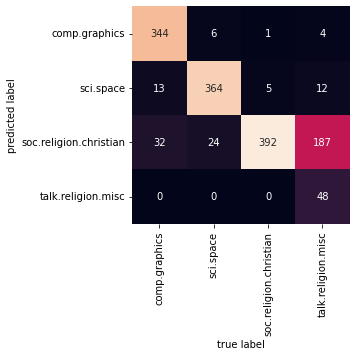

In [840]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

__Example 2__

In [317]:
loan_data = pd.read_csv("\\loan_data.csv")

# convert to categorical
loan_data.outcome = loan_data.outcome.astype('category')
loan_data.outcome.cat.reorder_categories(['paid off', 'default'])
loan_data.purpose_ = loan_data.purpose_.astype('category')
loan_data.home_ = loan_data.home_.astype('category')
loan_data.emp_len_ = loan_data.emp_len_.astype('category')

predictors = ['purpose_', 'home_', 'emp_len_']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', dtype=int)
y = loan_data[outcome]

naive_model = MultinomialNB(alpha=0.01, fit_prior=True)
#naive_model = MultinomialNB(alpha=1e-10, fit_prior=False)
naive_model.fit(X, y)

new_loan = X.loc[146:146, :]
print('predicted class: ', naive_model.predict(new_loan)[0])

probabilities = pd.DataFrame(naive_model.predict_proba(new_loan),
                             columns=naive_model.classes_)
print('predicted probabilities',)
print(probabilities)

predicted class:  default
predicted probabilities
    default  paid off
0  0.653696  0.346304


In [1077]:
X.head(3)

credit_card  debt_consolidation  home_improvement  major_purchase  medical  \
0            0                   0                 0               1        0   
1            0                   0                 0               0        0   
2            0                   0                 0               0        0   

   other  small_business  MORTGAGE  OWN  RENT   < 1 Year   > 1 Year  
0      0               0         0    0     1          0          1  
1      0               1         0    1     0          0          1  
2      1               0         0    0     1          0          1

In [247]:
classificationSummary(y, naive_model.predict(X))

Confusion Matrix (Accuracy 0.5425)

       Prediction
Actual     0     1
     0 11746 10925
     1  9821 12850


# Linear Regression

__NOTES:__

- Uses continuous data. It is possible to use categorical data but it must be preprocessed and transformed to a numerical format before being used in linear regression. Below are few things to consider:

    -  Features such as ['Red','Blue','Green'] do not have any inherent/implied order. It's best to avoid using such categorical data but if it is absolutely necessary then the first step is to use pd.dummies or ordinal encorder to transform the data to '0 or 1'. The second step is to use MinMaxScaler which will transform all other features to a min-max of 0-1. This will ensure the data is leveled/balanced.
    
    - Features such as ['cold', 'warm','hot'] have any inherent/implied order. Use the Ordinal encoder to transform the data to [0, 1, 2].
    
__PARAMETERS:__

- `copy_X` - when copy_X=True (default behavior), the model works with a copy of the input data. Modifying the original data after fitting the model does not affect the model's coefficients. However, when copy_X=False, the model works directly with the input data, and modifications to the original data can affect the model. It's important to note that using copy_X=True is generally safer, and modifying the original data after fitting the model is not recommended. The example is provided to illustrate the behavior of the copy_X parameter, but in practice, you would typically use the default value (copy_X=True).


- `n_jobs:` 

    Parallelization in scikit-learn refers to the ability of certain algorithms to perform computations concurrently using multiple processor cores. This can lead to significant speedup, especially for large datasets or computationally intensive tasks. Scikit-learn provides the n_jobs parameter in various algorithms, allowing users to control the degree of parallelization.

    n_jobs=1: No parallelization, the computation is performed using a single core.
    
    n_jobs=-1: Use all available CPU cores for parallel computation.
    
    
- `fit_intercept:` 

    This parameter is usually always True. But the rare cases when it should be set to False:

    __Regularization Techniques:__

    Some regularization techniques, such as Lasso regression, implicitly penalize the intercept term. In such cases, setting fit_intercept=False can be beneficial.
    
    __Centered Data:__

    If your data is already centered, meaning that the mean of each predictor variable is zero, setting fit_intercept=False can be appropriate. In such cases, including an intercept might introduce redundancy.


## Simple Linear Regression

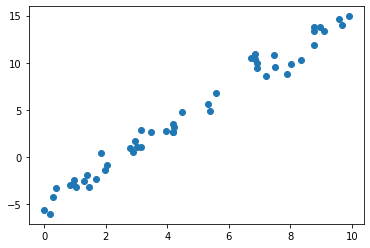

In [250]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

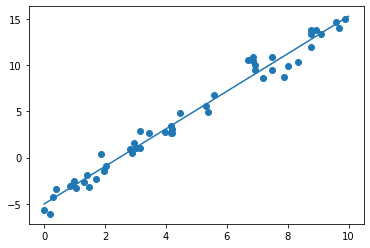

In [251]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

In [1175]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606944
Model intercept: -4.9985770855532


## Polynomial Linear Regression

In [1081]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

As we saw in Feature Engineering, the cleanest way to accomplish this is to use a pipeline. Let's make a 7th-degree polynomial model in this way:

In [1086]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7),
                     LinearRegression())

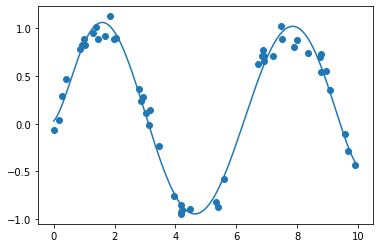

In [1087]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### Multiple Linear Regression

Refer to raw data:

In [310]:
#Import the data
HOUSE_CSV = "\\house_sales.csv"
house = pd.read_csv(HOUSE_CSV, sep='\t')

subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']

print(house[subset].head(2))

   AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
1      300805.0           2400     9373       3.00         6          7
2     1076162.0           3764    20156       3.75         4         10


The printed results below show the coefficients which state how the value of 'AdjSalePrice' changes in respect to each feature.

In [311]:
#Separate features and targets
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

#Fit the model
house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240754
 SqFtLot: -0.06046682065306008
 Bathrooms: -19442.840398321146
 Bedrooms: -47769.955185214094
 BldgGrade: 106106.9630789811


### Assessing the Linear Regression

#### R2 and RSME

The linear regression models can be fitted and then provide the slope(coeff) and the intercept. But for some odd reason, it doesn't provide the RMSE (Residual Mean Squared Error) or R2 (Residuals squared). You must use `sklearn.metrics` module to get these values.

R-squared is possibly the most important measurement produced by this summary. R-squared is the measurement of how much of the independent variable is explains the changes in our dependent variables. In percentage terms, 0.338 would mean our model explains 33.8% of the change in a dependent variable. An R2 value of 1.0 is a perfect fit; 100% of the change in X contributes to the the value of y.

In [1213]:
from sklearn.metrics import r2_score, mean_squared_error

fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted) #compare the fitted values to the target values
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


#### Statsmodels vs Statsmodels.formula

`statsmodels.api as sm` and `statsmodels.formula.api as smf` are two methods that provide an in-depth report for linear regression models. Both provide the exact same results/report, the difference is how the inputs are entered into the model.

`statsmodels.api as sm` requires a mask for indepednent variables (X) and target variable (y) as an input.

The default setting in this model does not allow intercept, and in order to estimate it, we must add an additional const 1 column in the input variable. This can be easily done with dataframe.assign(const=1) command.

`statsmodels.formula.api as smf` uses a string formula in the following format: 'Target_variable ~ ind_var_1 + ind_var_2....'

__HOW TO READ OLS REPORT:__

    Dependent Variable: y outcome
    Df Residuals: degrees freedom of Residuals
    Df Model: Number of features
    Covariance Types: robust covariance is calculated in a way to minimize or eliminate variables
    Adj. R-Squared: Considers the number of predictors in the model and penalizes excessive variables.
    p-value: p-value of 0.323 is saying there is a 32.3% chance that this variable has no effect on the dependent variable.
    Omnibus: 0 equals perfect normalcy.
    Skew: 0 equals perfect symmetry of data
    Kurtosis: Higher means fewer outliers
    Durbin_Watson: Ideally between 1-2 for homoscedaasticity
    JB: alternative version of omnibus
    Condition Number: sensitivity of model.

In [1207]:
import statsmodels.api as sm

model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:53:04   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694

Notice how the R2 value stated in the OLS is the same value as the R2 value stated in the sklearn.metrics method. 

You can also use SMF to have the input as a string format. This eliminates the need of having a mask to separate the features and target into separate dataframes to fit the model. You'll notice that you get the exact same results

In [1206]:
import statsmodels.formula.api as smf

model_smf = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house)
result_smf = model_smf.fit()
print(result_smf.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:43:18   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.219e+05   1.57e+04    -33.342

## L1 - Lasso Regularization/Regression

Below is Lasso Regression with the alpha/lambda/penalty equal to 1. Notice that it gives near the same results as the LinearRegression model.

__HYPERPARAMETERS:__

- `alpha` Default = 1. This is the penalty term.


- `fit_intercept`


- `normalize` Depricated - use sklearn.preprocessing.standardscaler


- `precompute` Use a matrix to speed up to the calculations


- `copy_x` when copy_X=True (default behavior), the model works with a copy of the input data. Modifying the original data after fitting the model does not affect the model's coefficients. However, when copy_X=False, the model works directly with the input data, and modifications to the original data can affect the model. It's important to note that using copy_X=True is generally safer, and modifying the original data after fitting the model is not recommended. The example is provided to illustrate the behavior of the copy_X parameter, but in practice, you would typically use the default value (copy_X=True).


- `max_iter` Maximum quanitty of interations to find the minimum SSR.


- `tol` The tolerance of how close to find the 'zero derivative' for minimum SSR. Continuous Variables can work with an infinite number of decimal points. A tolerance let's us know how close to zero is close enough. For example, there's no difference betwen 0.00001 and 0.00000000000000001 unless we set a tolerance.


- `warm_start`When set to True, reuse the solution of the previous call to fit as
    initialization, otherwise, just erase the previous solution. (computation optimizer)
    
    
- `positive` Sets all the coefficients to be positive


- `random_state` Select the seed for the random generator. This ensures that model will use the same set of randomized data every single time. This is beneficial if you want to compare model predictions before-and-after hyperparameter tuning.


- `selection`If set to 'random', a random coefficient is updated every iteration
    rather than looping over features sequentially by default. This
    (setting to 'random') often leads to significantly faster convergence
    especially when tol is higher than 1e-4 (computation optimizer)
    


In [313]:
from sklearn.linear_model import Lasso

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lasso = Lasso(alpha=1)
house_lasso.fit(house[predictors], house[outcome])


print(f'Lasso Regresion Results Intercept: {house_lasso.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lasso.coef_):
    print(f' {name}: {coef}')
    
   

print("""
Original Linear Regression Results
Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240754
 SqFtLot: -0.06046682065306008
 Bathrooms: -19442.840398321146
 Bedrooms: -47769.955185214094
 BldgGrade: 106106.9630789811""")

Lasso Regresion Results Intercept: -521865.745
Coefficients:
 SqFtTotLiving: 228.8291603405385
 SqFtLot: -0.06046049106398053
 Bathrooms: -19438.444693369373
 Bedrooms: -47768.88743578206
 BldgGrade: 106104.89849375837

Original Linear Regression Results
Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240754
 SqFtLot: -0.06046682065306008
 Bathrooms: -19442.840398321146
 Bedrooms: -47769.955185214094
 BldgGrade: 106106.9630789811


In [1257]:
print('Linear Regression R2 Score: ' + str(r2_score(house[outcome], house_lm.predict(house[predictors]))))
print('Lasso Regression R2 Score: ' + str(r2_score(house[outcome], house_lasso.predict(house[predictors]))))

Linear Regression R2 Score: 0.5405875253381902
Lasso Regression R2 Score: 0.5405875252874968


## L2 - Ridge Regularization/Regression

__HYPERPARAMETERS:__

- `alpha` Default = 1. This is the penalty term.


- `fit_intercept`


- `normalize` Depricated - use sklearn.preprocessing.standardscaler


- `precompute`Use a matrix to speed up to the calculations


- `copy_x` when copy_X=True (default behavior), the model works with a copy of the input data. Modifying the original data after fitting the model does not affect the model's coefficients. However, when copy_X=False, the model works directly with the input data, and modifications to the original data can affect the model. It's important to note that using copy_X=True is generally safer, and modifying the original data after fitting the model is not recommended. The example is provided to illustrate the behavior of the copy_X parameter, but in practice, you would typically use the default value (copy_X=True).


- `max_iter` Maximum quantity of interrations to find the minimum SSR.


- `tol` The tolerance of how close to find the 'zero derivative' for minimum SSR. A tolerance let's us know how close to zero is close enough. For example, there's no difference betwen 0.00001 and 0.00000000000000001 unless we set a tolerance.


- `solver` refers to the algorithm or method used to compute the coefficients of the linear regression model. The solver determines how the optimization problem associated with Ridge Regression is solved.
    - __'auto'__ chooses solver automatically based on the type of data
    
    -  __'svd'__ uses a Singular Value Decomposition of X to compute the Ridge coefficients. More stable for singular matrices than 'cholesky'. General-purpose matrix decomposition method that can be applied to any matrix, including rectangular matrices. 

    -   __'cholesky'__ This solver is particularly advantageous when dealing with well-conditioned matrices, as it can provide numerical stability and avoid some of the issues associated with other solvers, especially in situations where the matrix is close to singular.symmetric and positive-definite matrices. It is commonly used in numerical linear algebra and optimization problems where the matrix involved is symmetric. It is suitable for small to moderately sized datasets with dense features.

    - __'lsqr'__ (Least Squares Solution). Minimizes Sum of Squared Residual. It is particularly useful when dealing with large and sparse datasets (datasets that contain mostly zeros).

    - __'sparse_cg'__ As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set tol and max_iter ). 'lsqr' uses the dedicated regularized least-squares routine scipy. sparse.

    - __'sag'__ optimizes the sum of a finite number of smooth convex functions. Like stochastic gradient (SG) methods, the SAG method’s iteration cost is independent of the number of terms in the sum. It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.  It updates the coefficients based on a random subset of samples in each iteration.

    - __'saga'__ variant of SAG that also supports the non-smooth penalty L1 option (i.e. L1 Regularization). Hence, is therefore the solver of choice for sparse multinomial logistic regression and is also suitable for very Large dataset.

    - __'lbfgs'__ The Hessian matrix is approximated and stores only a few vectors. The approximation speeds up the computational speed but you have to pay attention to it because it may not converge to anything.


- `positive` Sets all the coefficients to be positive


- `random_state` Select the seed for the random generator. This ensures that model will use the same set of randomized data every single time. This is beneficial if you want to compare model predictions before-and-after hyperparameter tuning.


In [306]:
from sklearn.linear_model import Ridge

HOUSE_CSV = "\\house_sales.csv"
house = pd.read_csv(HOUSE_CSV, sep='\t')

subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_ridge = Ridge(solver='lsqr')
house_ridge.fit(house[predictors], house[outcome])


print(f'Ridge Regresion Results Intercept: {house_ridge.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_ridge.coef_):
    print(f' {name}: {coef}')
    
   

print("""
Original Linear Regression Results
Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240754
 SqFtLot: -0.06046682065306008
 Bathrooms: -19442.840398321146
 Bedrooms: -47769.955185214094
 BldgGrade: 106106.9630789811""")

Ridge Regresion Results Intercept: -44664.393
Coefficients:
 SqFtTotLiving: 293.12299504886744
 SqFtLot: 0.012731140261855733
 Bathrooms: 0.18964399862734102
 Bedrooms: 0.13132291910626692
 BldgGrade: 0.3715895679309422

Original Linear Regression Results
Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240754
 SqFtLot: -0.06046682065306008
 Bathrooms: -19442.840398321146
 Bedrooms: -47769.955185214094
 BldgGrade: 106106.9630789811


In [315]:
print('Linear Regression R2 Score: ' + str(r2_score(house[outcome], house_lm.predict(house[predictors]))))
print('Lasso Regression R2 Score: ' + str(r2_score(house[outcome], house_lasso.predict(house[predictors]))))
print('Ridge Regression R2 Score: ' + str(r2_score(house[outcome], house_ridge.predict(house[predictors]))))

Linear Regression R2 Score: 0.5405875253381902
Lasso Regression R2 Score: 0.5405875252874968
Ridge Regression R2 Score: 0.4832306381928767


## Logisitic Regression Method 

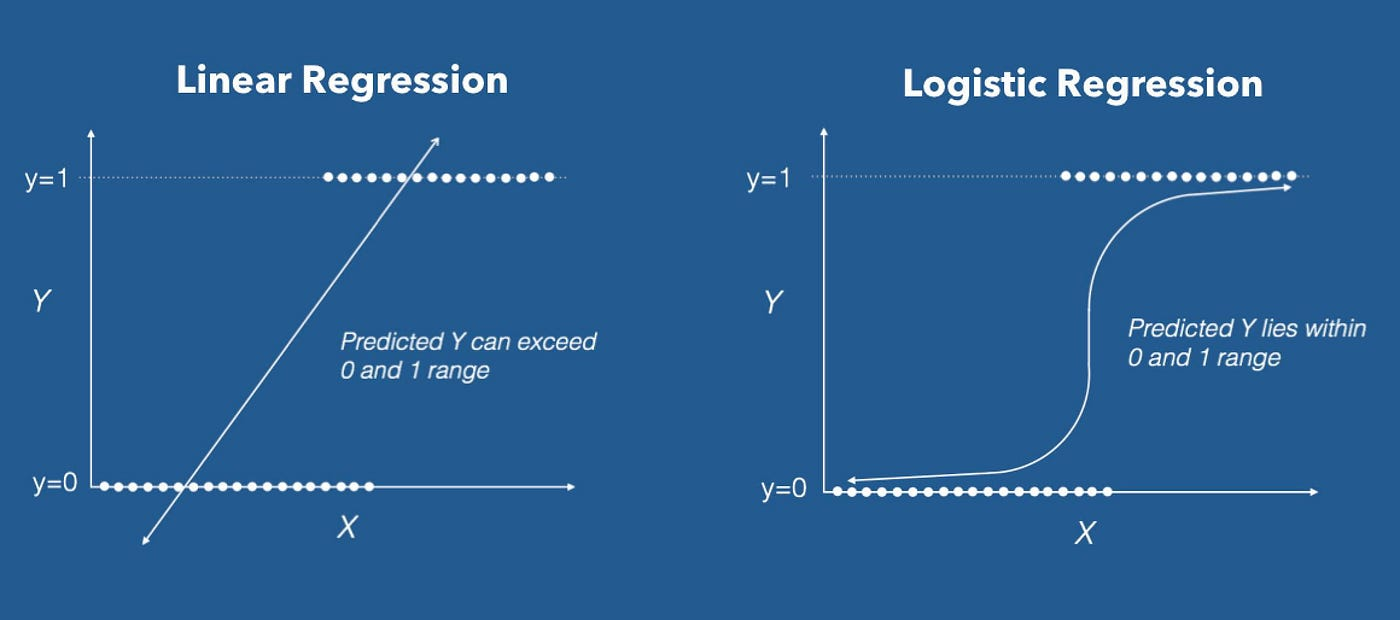

The response in logistic regression formula is the log odds of a binary outcome of 1. We observe only the binary outcome, not the log odds. Logistic Regression is a special instance of a generalized linear model (GLM) developed to extend linear reegression to other settings.

__NOTE:__ 

- Can you both continuous and discrete data but be sure to preprocess and transform discrete data. Refer to comments in the Linear Regression section for further details.


- The thresold for a classification is a probability >= 0.5. If this needs to be adjusted (refer to ROC/AUC curve). Then you would you filter the predict as such:

   
    y_pred_new_threshold = (lr.predict_proba(X_test)[:, 1] >= 0.9).astype(int) 
    
    accuracy_score(y_test, y_pred_new_threshold)

__PROS:__
Because of its efficient and straightforward nature, it doesn't require high computation power, is easy to implement, easily interpretable, and used widely by data analysts and scientists. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

__CONS:__
Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

Also assumes that the data has an S-shape. It performs poorly if there is a lot of overlap between data.

__HYPERPARAMETERS:__

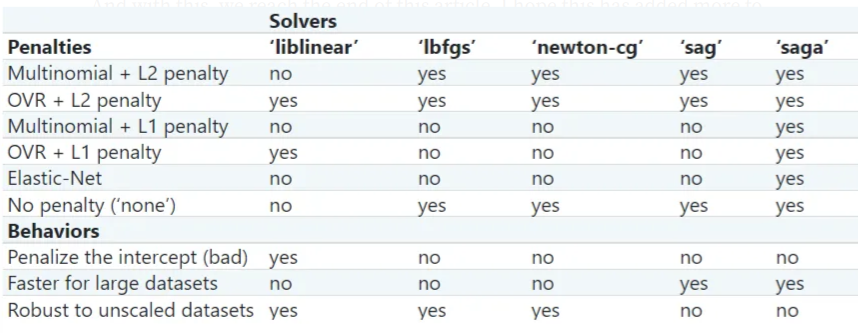

- `penalty` l2 (ridge regression) or l1 (lasso regression) penalty


- `dual` Dual or Primal Formulation - Dual formulation is only implemented for
    l2 penalty with liblinear solver. Primal minimizes teh logsitc loss with respect to the model parameters. Dual includes multipliers then solves for the dual variables.
    

- `tol` parameter controls the tolerance to declare convergence during the iterative optimization process. The optimization algorithm used in logistic regression iteratively updates the model's coefficients to minimize the loss function. Convergence is reached when the change in the coefficients is small enough, and the algorithm is considered to have found an acceptable solution.

    Similar to multiple linear regression, execpt the outcome is binary (classification). Think of the outcome variable not as a binary but as a probability. The binary classificaiton is an output of the highest probability. In a perfect world, a value of 0 means the SSR and been minimized to the absolute minimum. Tolerence let's us know "How close to zero is close enough". Think of it has an acceptable standard deviation.
    

- `C` inverse regularization. Smaller values specify stronger regularization.


- `fit_intercept` If this parameter is set to False then the y-intercept will be set to 0.


- `max_iter=100` limits the number of iterations during the training process. If the algorithm does not converge within the specified maximum number of iterations, it will stop and return the current solution. You may need to adjust max_iter based on the characteristics of your data and the specific optimization algorithm used. Increasing max_iter might be necessary for complex models or large datasets.


- `intercept_scaling` Only applicable to liblinear.


- `class_weight` In logistic regression, the class_weight parameter is used to address the issue of imbalanced classes in the target variable. Imbalanced classes occur when one class has significantly fewer samples than another class. This imbalance can affect the model's ability to learn and generalize well, especially if the minority class is of interest.  It is a dictionary or a string specifying how to assign weights to classes.If it is a dictionary, you can explicitly set the weight for each class. For example, {0: 1, 1: 10} assigns a weight of 1 to class 0 and a weight of 10 to class 1. The class_weight parameter allows you to assign different weights to different classes. By assigning higher weights to the minority class, you can potentially improve the model's performance on the minority class and prevent it from being overshadowed by the majority class. If possible, minority classes should be preprocessed beforehand by downsampling or undersampling. Refer to that section for more details



- `random_state` All stats use randomized data. Two persons who use the same random_state values will get the same results.

- `solver`:

    A. __'newton-cg'__ ['l2', 'none']. Uses a Hessian Matrix which is better than normal gradient descent because it includes partial derivatives for increased accuracy. The drawback is that it's computationally expensive it's slow on large datasets.
    
    Imagine you're on a treasure hunt in a vast hilly terrain, and your goal is to reach the highest point to find the hidden treasure. Each step you take costs you some energy, and you want to find the most efficient way to climb to the top. The solver optimizes your climbing path, ensuring that each step you take brings you closer to the highest point. It's like having a guide who knows how to tweak your route for the most effective ascent. This is how newton-cg works.
    
    
    B. __'lbfgs'__ ['l2', 'none'] The Hessian matrix is approximated and stores only a few vectors. The approximation speeds up the computational speed but you have to pay attention to it because it may not converge to anything.
    
    Imagine you're planning a road trip and want to find the shortest path to your destination. You have a map with many possible routes, but you want to discover the quickest way to get there. Just as a skilled navigator might suggest taking small steps and adjusting your course as you travel, the "lbfgs" solver recommends making careful adjustments to your solution to steadily minimize the overall distance. Works like newton-cg but on a different terrain. Think about having a tour guide that can help you find the most efficient way to climb a hill and another tour guide that can help you drive the shortest distance to the next city.
    
    C. __'liblinear'__ ['l1', 'l2'] The solver uses a Coordinate Descent (CD) algorithm that solves optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes. liblinear applies L1 Regularization and it’s recommended when we have high dimension dataset (recommended for solving large-scale classification problems). 
    
    It cannot learn a true multinomial (multiclass) model; instead, the optimization problem is decomposed in a “one-vs-rest” fashion, so separate binary classifiers are trained for all classes.
   
    D. __'sag'__ ['l2', 'none'] SAG method optimizes the sum of a finite number of smooth convex functions. Like stochastic gradient (SG) methods, the SAG method’s iteration cost is independent of the number of terms in the sum.

    It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.
    
    E. __'saga'__ The SAGA solver is a variant of SAG that also supports the non-smooth penalty L1 option (i.e. L1 Regularization). Hence, is therefore the solver of choice for sparse multinomial logistic regression and is also suitable for very Large dataset.
    
    __NOTE:__ It's best to use 'auto' unless you suspect the data has a local minimum - or - you would like to experiment to improve computational speed.
    
    
- `verbose` displays some progress information during hte training process. Only works for liblinear and lbfgs.


- `n jobs` parallelization. Used to speed up computation speed. Should only modify after all the other hyperparameters have been tuned to improve efficacy.


- `l1_ratio` Only if elasticnet is used for the penalty. This parameter assigns the ratio of L1 and L2 regularization.

In [318]:
from sklearn.linear_model import LogisticRegression

predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_', 
              'borrower_score']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', 
                   drop_first=True, dtype=int)
y = loan_data[outcome] # .cat.categories


"""penalty and C are used to prevent overfitting. We set pentalty and C to large values to prevent regularization"""
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X.columns)

intercept  -1.638088683407208
classes ['default' 'paid off']


coeff
payment_inc_ratio  -0.079728
borrower_score      4.611037
debt_consolidation -0.249342
home_improvement   -0.407614
major_purchase     -0.229376
medical            -0.510087
other              -0.620534
small_business     -1.215662
OWN                -0.048453
RENT               -0.157355
 > 1 Year           0.357464

In [319]:
from dmba import classificationSummary
classificationSummary(y, logit_reg.predict(X), class_names=logit_reg.classes_)

Confusion Matrix (Accuracy 0.6365)

         Prediction
  Actual  default paid off
 default    14336     8335
paid off     8148    14523


In [320]:
logit_reg.predict_proba(X)

array([[0.24250183, 0.75749817],
       [0.31440728, 0.68559272],
       [0.51662729, 0.48337271],
       ...,
       [0.44768059, 0.55231941],
       [0.27833029, 0.72166971],
       [0.54263247, 0.45736753]])

In [1401]:
logit_reg.predict_proba(X)[:, 0]

array([0.24250183, 0.31440728, 0.51662729, ..., 0.44768059, 0.27833029,
       0.54263247])

In [ ]:
"""PLOT S-CURVE PLOT. NOT WORKING"""

sns.regplot(x=loan_data['payment_inc_ratio'], y = loan_data[outcome], logistic=True,)

In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Logistic Regression with dual=False (primal optimization)
model_primal = LogisticRegression(dual=False, random_state=42)
model_primal.fit(X_train, y_train)

# Make predictions on the test set
y_pred_primal = model_primal.predict(X_test)

# Print accuracy
accuracy_primal = accuracy_score(y_test, y_pred_primal)
print("Accuracy (primal):", accuracy_primal)

# Instantiate Logistic Regression with dual=True (dual optimization)
model_dual = LogisticRegression(dual=True, random_state=42, solver='liblinear')
model_dual.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dual = model_dual.predict(X_test)

# Print accuracy
accuracy_dual = accuracy_score(y_test, y_pred_dual)
print("Accuracy (dual):", accuracy_dual)

Accuracy (primal): 1.0
Accuracy (dual): 1.0


C:\Users\Monarch Eubanks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monarch Eubanks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Linear Discriminant Analysis Classification Method

Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events.

Works with both category and continuous variables. Refer to comments in Linear Regression - category variables require preprocessing and dataset transformation

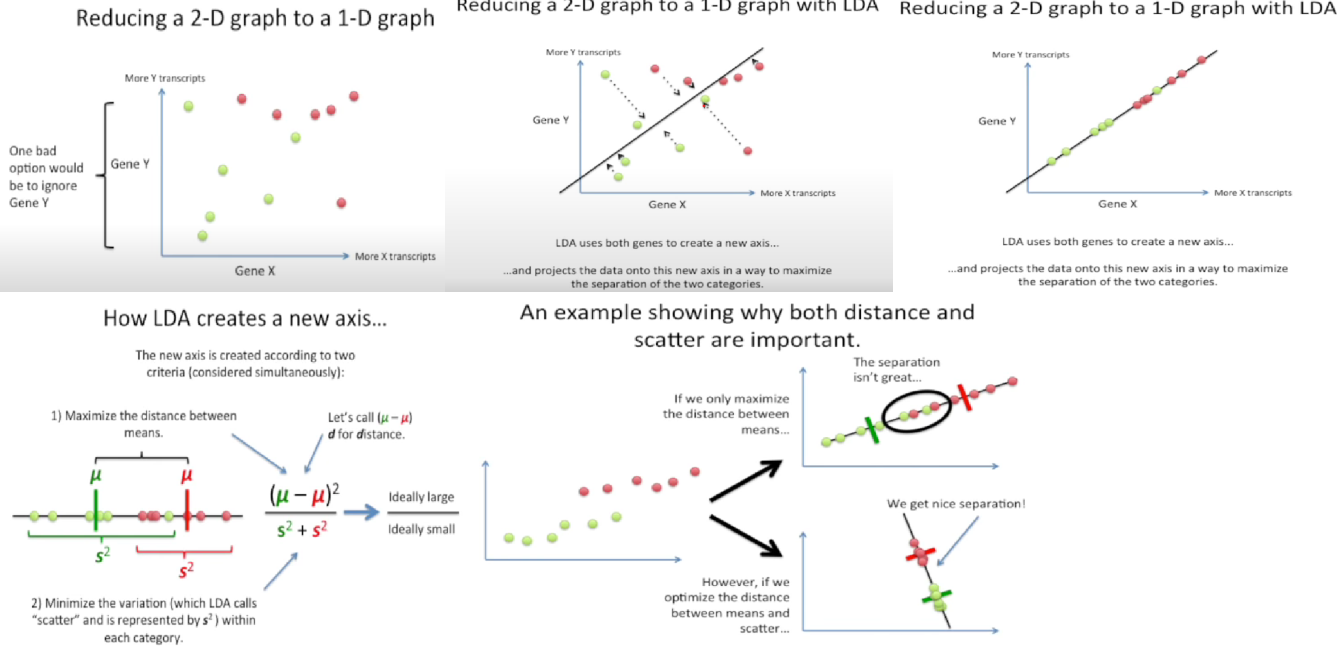

LDA maximizes the difference between means of two features while also minimizing scatter. A new plane is created to perform this task and then it is plotted on a two-dimensional field.

__PROS:__

- Manage high-dimensional data: LDA is effective where the number of features is significantly larger than the number of training samples. LDA is therefore particularly valuable in applications like text analysis, image recognition, and genomics, where data is often high-dimensional.

__CONS:__

- Another disadvantage of LDA is that it's not applicable for non-linear problems, e.g. separation of donut-shape point clouds, but in high dimensional spaces it's hard to spot it right away. Usually you understand this after you see LDA not working, but if the data is known to be very non-linear, this is a strong sign against LDA.

In addition, LDA can be sensitive to overfitting and need careful validation / testing.


__HYPERPARAMETERS:__

- `solver`

    A. __'svd'__ (Singular Value Decomposition) Imagine you have a matrix that represents some data, such as a spreadsheet of numbers. SVD allows you to decompose this matrix into three separate matrices that capture different aspects of the data. The first matrix represents how the original data points are related to each other in a new coordinate system.Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.
    
    Imagine having a picture of a rainbow. The picture is made up of pixels of different colors; some more bright and distinct than the other and you break down the picture into its most important and simple parts. You recreate the picture but instead of using every tiny detail, you only use the most critical dots that recreates the essence of the picture without losing its integrity.
    
    B. __'lsqr'(Least Squares Solution)__. Minimizes Sum of Squared Residuals.
    
    C. __'eigen'__. Eigendecomposition breaks down a matrix into its eigenvalues and eigenvectors to help you find the non-obvious and universal properties. It's like a kid breaking stuff to see what's inside and how it works.
    
    
- `shrinkage` refers to a technique used to improve the efficiency of the training process. The idea behind shrinking is to identify and exclude support vectors that are unlikely to affect the decision boundary significantly. This can lead to faster training times without significantly compromising the accuracy of the model.


- `priors` The class prior probabilities. By default, the class proportions are
    inferred from the training data.
    

- `n_components` Parameter for dimensionality reduction. If None, will be set to min(n_classes - 1, n_features)


- `store_covariance` Parameter is used to control whether the covariance matrices are stored after the model is fitted.Keep in mind that storing covariance matrices may consume additional memory, so it's a trade-off between memory usage and the potential benefits of having access to the covariance information.


- `tol` parameter controls the tolerance to declare convergence during the iterative optimization process. The optimization algorithm used in logistic regression iteratively updates the model's coefficients to minimize the loss function. Convergence is reached when the change in the coefficients is small enough, and the algorithm is considered to have found an acceptable solution.


- `covariance_estimator`  the covariance_estimator parameter is used to specify the method for estimating covariance matrices when the solver is set to 'lsqr' or 'eigen'.

In [6]:
from dmba import classificationSummary
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LOAN3000_CSV = "\\loan3000.csv"
loan3000 = pd.read_csv(LOAN3000_CSV)
loan3000.outcome = loan3000.outcome.astype('category')

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X, y)
print(pd.DataFrame(loan_lda.scalings_, index=X.columns))

                          0
borrower_score     7.175839
payment_inc_ratio -0.099676


In [233]:
loan3000.head(3)

Unnamed: 0   outcome            purpose_    dti  borrower_score  \
0       32109  paid off  debt_consolidation  21.23             0.4   
1       16982   default         credit_card  15.49             0.4   
2       25335  paid off  debt_consolidation  27.30             0.7   

   payment_inc_ratio  
0            5.11135  
1            5.43165  
2            9.23003

In [234]:
classificationSummary(y, loan_lda.predict(X), class_names=loan_lda.classes_)

Confusion Matrix (Accuracy 0.6290)

         Prediction
  Actual  default paid off
 default      852      593
paid off      520     1035


In [235]:
loan_lda.classes_

array(['default', 'paid off'], dtype='<U8')

In [236]:
cross_val_score(loan_lda, X, y, cv=10)

array([0.62666667, 0.60666667, 0.61      , 0.62333333, 0.64666667,
       0.61666667, 0.65333333, 0.65      , 0.60666667, 0.62      ])

We can see that get_dummies had no impact on the accuracy.

In [237]:
loan3000_dummies = pd.get_dummies(loan3000)
loan3000_dummies.head(3)

Unnamed: 0    dti  borrower_score  payment_inc_ratio  outcome_default  \
0       32109  21.23             0.4            5.11135                0   
1       16982  15.49             0.4            5.43165                1   
2       25335  27.30             0.7            9.23003                0   

   outcome_paid off  purpose__credit_card  purpose__debt_consolidation  \
0                 1                     0                            1   
1                 0                     1                            0   
2                 1                     0                            1   

   purpose__home_improvement  purpose__major_purchase  purpose__medical  \
0                          0                        0                 0   
1                          0                        0                 0   
2                          0                        0                 0   

   purpose__other  purpose__small_business  
0               0                        0  
1               0                        0  
2               0                        0

In [243]:
Xdummies = loan3000_dummies[predictors]
ydummies = loan3000[outcome]


loan_lda.fit(Xdummies, ydummies)
classificationSummary(ydummies, loan_lda.predict(Xdummies), class_names=loan_lda.classes_)

Confusion Matrix (Accuracy 0.6290)

         Prediction
  Actual  default paid off
 default      852      593
paid off      520     1035


# Support Vector Machines

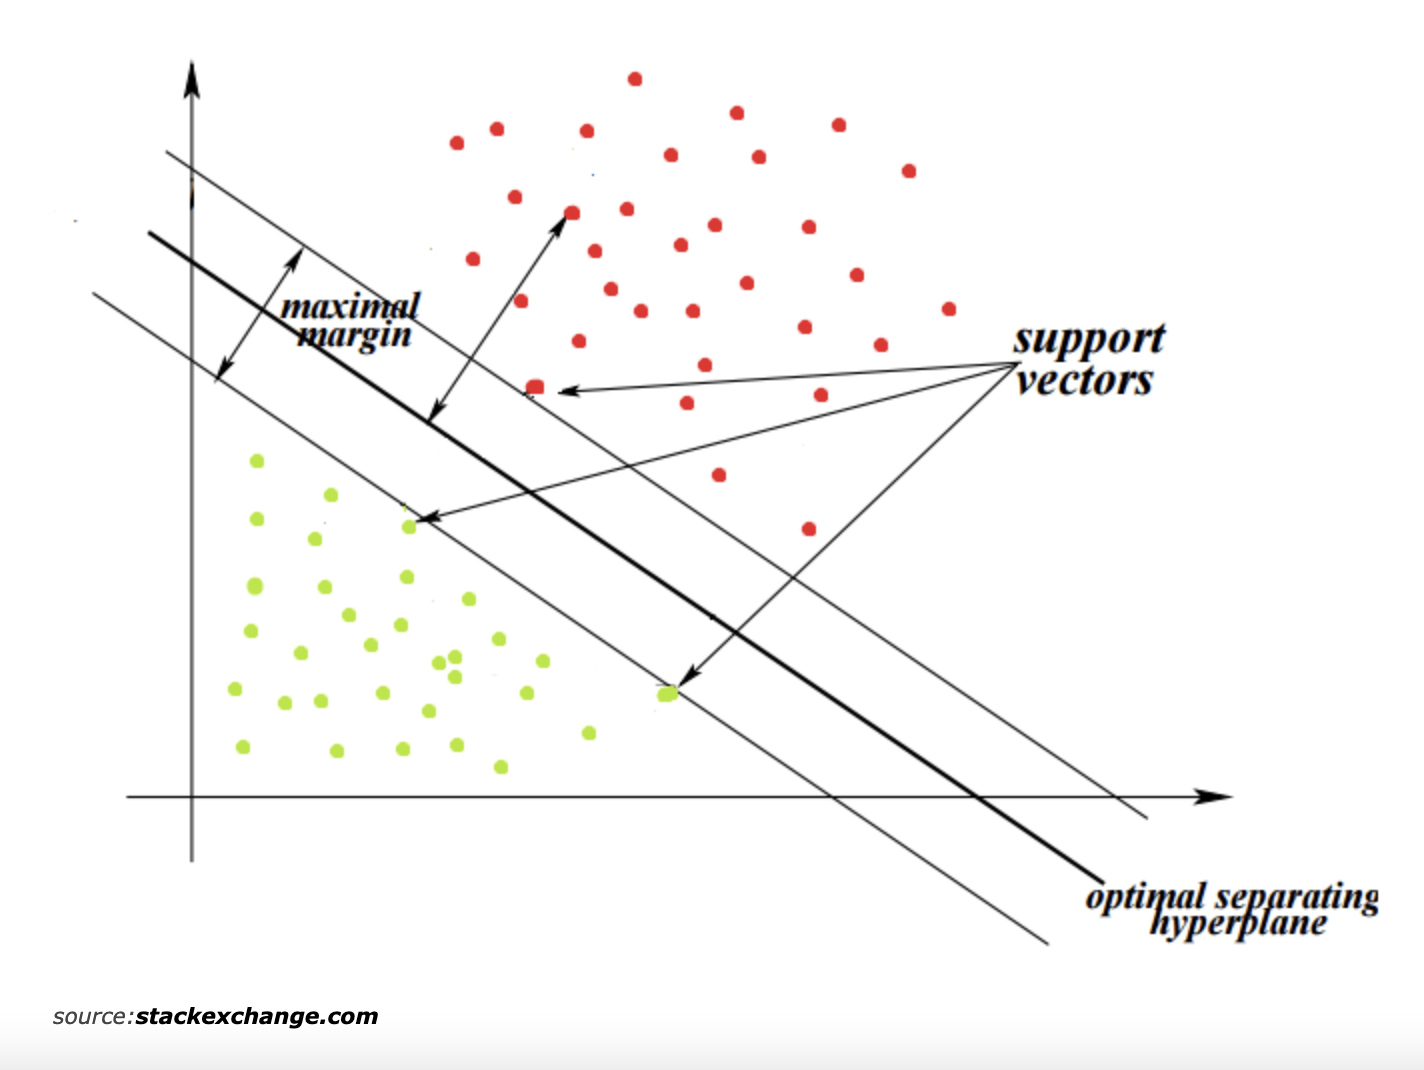


Support Vector Classifier can transform data and create a new dimension to separate data. For Example, in the picture below Dosage(mg) is on the x-axis, the Dosage(mg) was simply squared on the y-axis. Now you are able to separate the data without adding any new features.

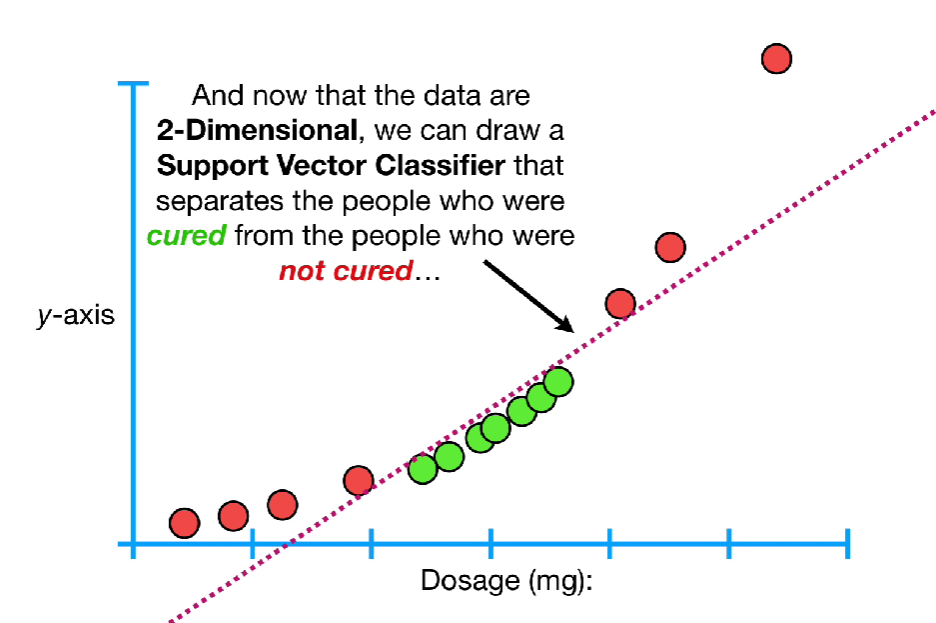

__PROS:__
- Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.

- The hyperparamters with kernel methods makes it versatile to adapt to many types of data.

- It is only effected by data points near the margin so it works well with high dimensional data.

__CONS:__

- Results do not have a direct probabilistic interpretation.

- Results are strongly dependent for the softening parameters which can only be found through cross-validation. This can be computationally expensive with large data sets.

__SUMMARY:__

Only use SVM when simpler and faster models are inefficient.

__Support Vector Machines__ are one of the best machine learning methods when getting the correct answer is a higher priority than understanding why you get the correct answer. They work really well with relatively small datasets and they tend to work well "Out of the Box". In other words, they do not require much optimization.

Prefers continuous data. Categorical Data can be used but it must be encoded/scaled/standardized.

RBF assumes the data is centered and scaled.


__PARAMETERS:__

- `C` inverse regularization. Smaller values specify stronger regularization. (REFER TO L1/L2 Regularization)


- `kernel` This is how the support vectors will be separated. 

    Radial Basis Function Kernel works like KNearestNeighbors which asigns weight to closer datapoints. It's refered to as a kernel trick because it does separation without having to perform the computations required to transform data to a higher dimension.



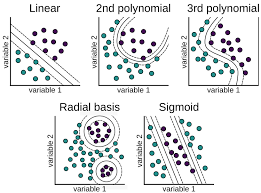

- `gamma`
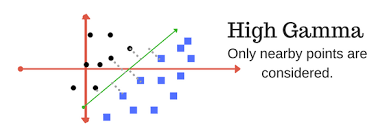
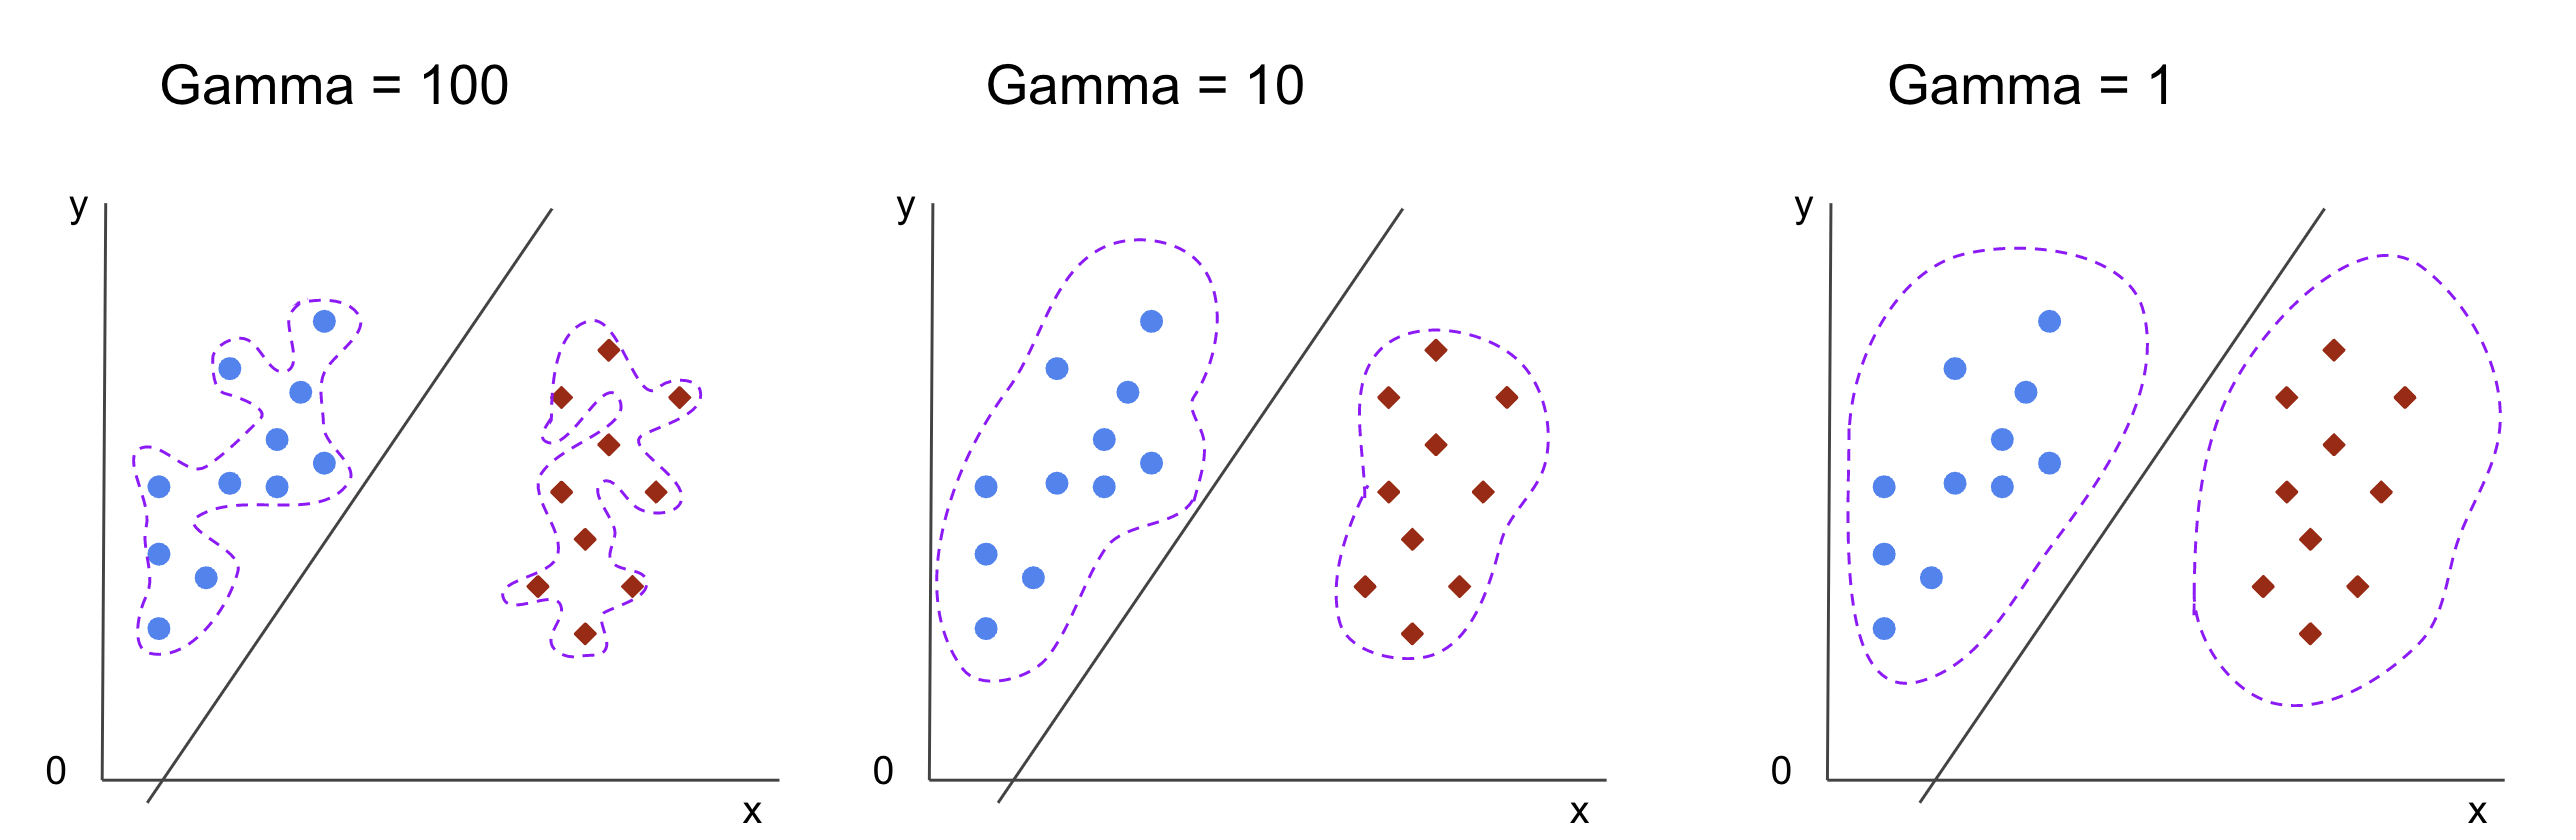


- `degree` The degree of the polynomial. This parameter is ignored by all other kernels.


- `coef0`  Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'. This  parameter influences the shape of the decision boundary and the importance of higher-order polynomials in the SVM model.


- `shrinking`  refers to a technique used to improve the efficiency of the training process. The idea behind shrinking is to identify and exclude support vectors that are unlikely to affect the decision boundary significantly. This can lead to faster training times without significantly compromising the accuracy of the model.


- `probability`  Whether to enable probability estimates. This must be enabled prior
    to calling `fit`, will slow down that method as it internally uses
    5-fold cross-validation, and `predict_proba` may be inconsistent with
    `predict`.
    

- `tol` parameter controls the tolerance to declare convergence during the iterative optimization process.  Convergence is reached when the change in the coefficients is small enough, and the algorithm is considered to have found an acceptable solution.In a perfect world, a value of 0 means the SSR and been minimized to the absolute minimum. Tolerence let's us know "How close to zero is close enough". Think of it has an acceptable standard deviation.


- _`cache_size` In the context of Support Vector Machines (SVMs), the "cache size" typically refers to the memory size allocated for caching the decision function values during training. The cache is used to store intermediate results that can be reused across iterations, aiming to speed up the training process.


- `class_weight` In logistic regression, the class_weight parameter is used to address the issue of imbalanced classes in the target variable. Imbalanced classes occur when one class has significantly fewer samples than another class. This imbalance can affect the model's ability to learn and generalize well, especially if the minority class is of interest.  It is a dictionary or a string specifying how to assign weights to classes.If it is a dictionary, you can explicitly set the weight for each class. For example, {0: 1, 1: 10} assigns a weight of 1 to class 0 and a weight of 10 to class 1. The class_weight parameter allows you to assign different weights to different classes. By assigning higher weights to the minority class, you can potentially improve the model's performance on the minority class and prevent it from being overshadowed by the majority class.


- `verbose` displays some progress information during hte training process. Only works for liblinear and lbfgs.


- `max_iter=100` limits the number of iterations during the training process. If the algorithm does not converge within the specified maximum number of iterations, it will stop and return the current solution. You may need to adjust max_iter based on the characteristics of your data and the specific optimization algorithm used. Increasing max_iter might be necessary for complex models or large datasets.


- `decision_function_shape` one-vs-one splits a multi-class classification dataset into binary classification problems. Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into one dataset for each class versus every other class. It's like doing separate t-test for 5 different classes (one-vs-one) or just doing one ANOVA (one-vs-rest).

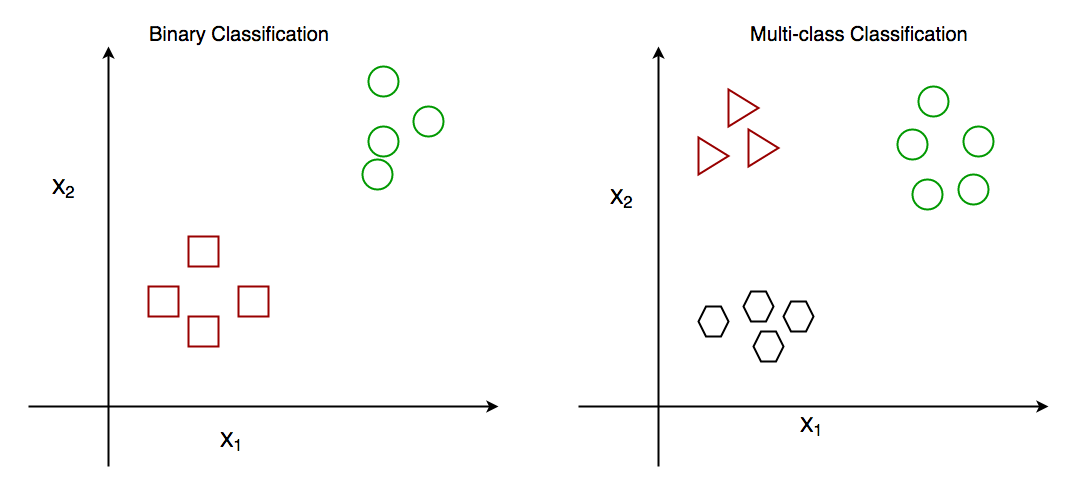


- `break_ties`  parameter is relevant when the decision function produces equal scores for multiple classes in a multi-class classification problem. This parameter is used to handle tie-breaking situations where the decision function yields the same score for multiple classes. the decision function will use a strategy to break ties, and it might lead to a slower decision-making process.


- `random_state` All stats use randomized data. Two persons who use the same random_state values will get the same results.

Below is the library for the SVC

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC requires a lot of tuning so sometimes it requires making a pipline.

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

A gridsearch is usually always required to fine tune the hyperparameters.

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

### SVM Case Study

#### Required Modules

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA

#### Data Cleaning 

In [102]:
df = pd.read_csv(r"\default of credit card clients.csv")
df.columns = df.loc[0].values
df = df[1:]
df.head(3)

ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  ...  \
1  1     20000   2         2        1  24     2     2    -1    -1  ...   
2  2    120000   2         2        2  26    -1     2     0     0  ...   
3  3     90000   2         2        2  34     0     0     0     0  ...   

  BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5  \
1         0         0         0        0      689        0        0        0   
2      3272      3455      3261        0     1000     1000     1000        0   
3     14331     14948     15549     1518     1500     1000     1000     1000   

  PAY_AMT6 default payment next month  
1        0                          1  
2     2000                          1  
3     5000                          0  

[3 rows x 25 columns]

In [103]:
#Alternative formatting method
df = pd.read_csv(r"\default of credit card clients.csv", header=1)
df.head(3)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  

[3 rows x 25 columns]

In [105]:
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
df.head(3)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0         0         0         0        1  
1      1000         0      2000        1  
2      1000      1000      5000        0  

[3 rows x 25 columns]

In [106]:
df.drop('ID', axis=1, inplace=True)
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0         0         0         0        1  
1      1000         0      2000        1  
2      1000      1000      5000        0  
3      1100      1069      1000        0  
4      9000       689       679        0  

[5 rows x 24 columns]

In [107]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [108]:
df['SEX'].unique()

array([2, 1], dtype=int64)

Good. 1 = male, 2 = female

This column contains the correct values

In [51]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

We ask: _"What do values 0, 5, 6 represent?"_

In [52]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

(1 = married; 2 = single; 3 = others)


We ask: _"What is value 0?"_

__NOTE:__ 
We do not know what the value 0 represents. So we just have to assume that the value = N/A.

SVCM do not support datasets with missing values so we need to figure out what to do with 0. We can either delete these customers or impute values for missing data.

In [59]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [60]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [61]:
len(df)

30000

A total of 68 (14 + 54) values are 0 

only 68 of 30,000 is only 1% of the dataset. We'll simpy remove that missing values rather than imput their values.

In [109]:
df_no_missing = df.loc[(df['EDUCATION'] !=0) & (df['MARRIAGE'] !=0)]
len(df_no_missing)

29932

In [75]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [69]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

The math works out: 30000 - 68 = 29932

the unique() function on both Education and Marriage no longer show a 0 value.

__Support Vector Machines__ are great with small datasets, but not awesome with large ones. This dataset, while not huge, is big enough to take a long time to optimize with Cross Validation. We'll downsample both categories and customers who did and did not default to 1,000 each. We're doing this method to help with the computational power.

In [110]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

In [113]:
print(len(df_no_default))
print(len(df_default))

23301
6631


We see that there is an uneven number of no_default vs default. Downsampling will have an the additional benefit that there will be an even number of both targets.

In [115]:
df_no_default_downsampled = resample(df_no_default,
                                    replace=False, #replace will put a number back into the pool.
                                    n_samples=1000,
                                    random_state=42)

In [116]:
df_default_downsampled = resample(df_default,
                                    replace=False, #replace will put a number back into the pool.
                                    n_samples=1000,
                                    random_state=42)

In [117]:
print(len(df_no_default_downsampled))
print(len(df_default_downsampled))

1000
1000


In [119]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

Hurray! You've now downsampled the dataset into an even number of both targets.

In [124]:
X = df_downsample.drop('DEFAULT', axis=1).copy()
X.head(3)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
641       130000    2          3         1   28      0      0      0      0   
4678      170000    1          3         1   29      0      0      0      0   
16004     180000    2          2         1   29      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
641       -2  ...      50000          0          0          0      2500   
4678       0  ...     172307      35234      32869      33862      7200   
16004      0  ...      26310      26662      26166      26176      1800   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
641        1000         0         0         0         0  
4678       7500      1200      1200      1500      1300  
16004      1800      1500      1056       950      1000  

[3 rows x 23 columns]

In [127]:
y = df_downsample['DEFAULT'].copy()
y.head(3)

641      0
4678     0
16004    0
Name: DEFAULT, dtype: int64

If you review the data, you will notice that although some of the columns have integer values, these integers represent categories.

SEX, EDUCATION, MARRIAGE and PAY are supposed to be categorical and need to be modified. Support Vector Machines natively support continuous data like LIMIT_BAL and AGE and do not natively support categorical data. We'll need to use One-Hot Encoding to deal with this issue.

If we treated values, 1, 2 and 3 like continuous data, then we would assume that 3, which means "other" is more similar to 2 (single) than it is to 1 (married). That means the support vector machine would be likely to cluster the people with 3s and 2s rather than 3s and 1s. In contrast, if we treat the numbers like categorical data, then we treat each one as a separate category that is more or less similar to any of the other categories. Thus, the likelihood of clustering people with 3s and 2s is the same as clustering 3s and 1s, and that approach is more reasonable.

In [133]:
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
X_encoded.head()

LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
641       130000   28     100143      50456      50000          0          0   
4678      170000   29     165027     168990     172307      35234      32869   
16004     180000   29      25781      26000      26310      26662      26166   
22974     210000   32        355        975        410          0          0   
17535     190000   45      76433      78472      80548      81778      83082   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_5_7  PAY_6_-2  PAY_6_-1  \
641            0      2500      1000  ...        0         1         0   
4678       33862      7200      7500  ...        0         0         0   
16004      26176      1800      1800  ...        0         0         0   
22974          0       979       412  ...        0         1         0   
17535      84811      3300      3331  ...        0         0         0   

       PAY_6_0  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  
641          0        0        0        0        0        0        0  
4678         1        0        0        0        0        0        0  
16004        1        0        0        0        0        0        0  
22974        0        0        0        0        0        0        0  
17535        1        0        0        0        0        0        0  

[5 rows x 81 columns]

In [134]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_encoded, y, random_state=42)

NOTE TO SELF: RESEARCH THE SCALE FUNCTION

In [135]:
Xtrain_scaled = scale(Xtrain)
Xtest_scaled = scale(Xtest)

In [248]:
Xtrain.head()

LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
20804     290000   42          0          0          0          0       1855   
17890     170000   28      56061      57179      58450      58556      51671   
11135      90000   27      25118      26128      25248      26386      24171   
28988     160000   47       1857       1672        836        836        836   
7056      100000   29      48186      48924      47837      51361      50417   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_5_7  PAY_6_-2  PAY_6_-1  \
20804       3940         0         0  ...        0         0         1   
17890      51090      2051      2197  ...        0         0         0   
11135      25607      1440      1500  ...        0         0         0   
28988        836         0         0  ...        0         0         1   
7056       51400      1800         0  ...        0         0         0   

       PAY_6_0  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  
20804        0        0        0        0        0        0        0  
17890        1        0        0        0        0        0        0  
11135        1        0        0        0        0        0        0  
28988        0        0        0        0        0        0        0  
7056         1        0        0        0        0        0        0  

[5 rows x 81 columns]

In [147]:
Xtrain_scaled.shape

(1500, 81)

In [154]:
Xtrain_scaled_df = pd.DataFrame(Xtrain_scaled, columns = Xtrain.columns)
Xtrain_scaled_df.head(3)

LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0   1.067645  0.664594  -0.698715  -0.704665  -0.704472  -0.689681  -0.657429   
1   0.118064 -0.815100   0.043055   0.079368   0.153547   0.203071   0.179596   
2  -0.514989 -0.920792  -0.366367  -0.346400  -0.333843  -0.287397  -0.282468   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  ...   PAY_5_7  PAY_6_-2  PAY_6_-1   PAY_6_0  \
0  -0.599841 -0.359189 -0.285928  ... -0.057831 -0.422278  2.209605 -1.040833   
1   0.208023 -0.220387 -0.169119  ... -0.057831 -0.422278 -0.452570  0.960769   
2  -0.228600 -0.261737 -0.206177  ... -0.057831 -0.422278 -0.452570  0.960769   

    PAY_6_2   PAY_6_3   PAY_6_4  PAY_6_5   PAY_6_6   PAY_6_7  
0 -0.406818 -0.097063 -0.057831      0.0 -0.036539 -0.051709  
1 -0.406818 -0.097063 -0.057831      0.0 -0.036539 -0.051709  
2 -0.406818 -0.097063 -0.057831      0.0 -0.036539 -0.051709  

[3 rows x 81 columns]

In [162]:
Xtrain_scaled_df.describe()

LIMIT_BAL           AGE     BILL_AMT1    BILL_AMT2     BILL_AMT3  \
count  1.500000e+03  1.500000e+03  1.500000e+03  1500.000000  1.500000e+03   
mean  -4.736952e-18 -3.410605e-16 -2.842171e-17     0.000000  1.657933e-17   
std    1.000334e+00  1.000334e+00  1.000334e+00     1.000334  1.000334e+00   
min   -1.148042e+00 -1.554947e+00 -2.749235e+00    -0.820900 -3.013035e+00   
25%   -8.315156e-01 -8.151000e-01 -6.425241e-01    -0.655055 -6.612555e-01   
50%   -2.775939e-01 -1.809454e-01 -3.687616e-01    -0.370896 -3.841792e-01   
75%    5.137228e-01  6.645940e-01  1.770696e-01     0.189190  2.130065e-01   
max    4.628570e+00  3.518290e+00  6.535472e+00     6.638184  7.340209e+00   

          BILL_AMT4     BILL_AMT5     BILL_AMT6      PAY_AMT1     PAY_AMT2  \
count  1.500000e+03  1.500000e+03  1.500000e+03  1.500000e+03  1500.000000   
mean   5.210647e-17  2.842171e-17  9.473903e-18  9.473903e-18     0.000000   
std    1.000334e+00  1.000334e+00  1.000334e+00  1.000334e+00     1.000334   
min   -9.994822e-01 -1.030022e+00 -6.486073e+00 -3.591889e-01    -0.285928   
25%   -6.511083e-01 -6.572110e-01 -6.424185e-01 -3.323895e-01    -0.265193   
50%   -3.858182e-01 -3.755617e-01 -3.585697e-01 -2.238384e-01    -0.181480   
75%    1.607248e-01  1.509147e-01  1.752542e-01 -2.081275e-02    -0.060418   
max    7.401008e+00  7.454021e+00  6.522774e+00  1.580578e+01    18.028528   

       ...       PAY_5_7      PAY_6_-2      PAY_6_-1       PAY_6_0  \
count  ...  1.500000e+03  1.500000e+03  1.500000e+03  1.500000e+03   
mean   ... -5.921189e-18  5.092223e-17 -4.736952e-17 -2.605323e-17   
std    ...  1.000334e+00  1.000334e+00  1.000334e+00  1.000334e+00   
min    ... -5.783149e-02 -4.222783e-01 -4.525696e-01 -1.040833e+00   
25%    ... -5.783149e-02 -4.222783e-01 -4.525696e-01 -1.040833e+00   
50%    ... -5.783149e-02 -4.222783e-01 -4.525696e-01  9.607689e-01   
75%    ... -5.783149e-02 -4.222783e-01 -4.525696e-01  9.607689e-01   
max    ...  1.729162e+01  2.368107e+00  2.209605e+00  9.607689e-01   

            PAY_6_2       PAY_6_3       PAY_6_4  PAY_6_5       PAY_6_6  \
count  1.500000e+03  1.500000e+03  1.500000e+03   1500.0  1.500000e+03   
mean   7.993606e-17 -2.368476e-17 -1.184238e-18      0.0 -5.921189e-18   
std    1.000334e+00  1.000334e+00  1.000334e+00      0.0  1.000334e+00   
min   -4.068183e-01 -9.706320e-02 -5.783149e-02      0.0 -3.653920e-02   
25%   -4.068183e-01 -9.706320e-02 -5.783149e-02      0.0 -3.653920e-02   
50%   -4.068183e-01 -9.706320e-02 -5.783149e-02      0.0 -3.653920e-02   
75%   -4.068183e-01 -9.706320e-02 -5.783149e-02      0.0 -3.653920e-02   
max    2.458100e+00  1.030257e+01  1.729162e+01      0.0  2.736786e+01   

            PAY_6_7  
count  1.500000e+03  
mean   9.473903e-18  
std    1.000334e+00  
min   -5.170877e-02  
25%   -5.170877e-02  
50%   -5.170877e-02  
75%   -5.170877e-02  
max    1.933908e+01  

[8 rows x 81 columns]

__NOTE:__  Scale() and StandardScaler() do the exact same thing: set mean value = 0 and standard deviation = 1. You can see the results for StandardScaler (below) match the results for Scaler (above).

In [170]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

Xtrain_stds_df = stdscaler.fit_transform(Xtrain)
Xtrain_stds_df = pd.DataFrame(Xtrain_stds_df, columns = Xtrain.columns )
Xtrain_stds_df.head(3)

LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0   1.067645  0.664594  -0.698715  -0.704665  -0.704472  -0.689681  -0.657429   
1   0.118064 -0.815100   0.043055   0.079368   0.153547   0.203071   0.179596   
2  -0.514989 -0.920792  -0.366367  -0.346400  -0.333843  -0.287397  -0.282468   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  ...   PAY_5_7  PAY_6_-2  PAY_6_-1   PAY_6_0  \
0  -0.599841 -0.359189 -0.285928  ... -0.057831 -0.422278  2.209605 -1.040833   
1   0.208023 -0.220387 -0.169119  ... -0.057831 -0.422278 -0.452570  0.960769   
2  -0.228600 -0.261737 -0.206177  ... -0.057831 -0.422278 -0.452570  0.960769   

    PAY_6_2   PAY_6_3   PAY_6_4  PAY_6_5   PAY_6_6   PAY_6_7  
0 -0.406818 -0.097063 -0.057831      0.0 -0.036539 -0.051709  
1 -0.406818 -0.097063 -0.057831      0.0 -0.036539 -0.051709  
2 -0.406818 -0.097063 -0.057831      0.0 -0.036539 -0.051709  

[3 rows x 81 columns]

In [171]:
Xtrain_stds_df.describe()

LIMIT_BAL           AGE     BILL_AMT1    BILL_AMT2     BILL_AMT3  \
count  1.500000e+03  1.500000e+03  1.500000e+03  1500.000000  1.500000e+03   
mean  -4.736952e-18 -3.410605e-16 -2.842171e-17     0.000000  1.657933e-17   
std    1.000334e+00  1.000334e+00  1.000334e+00     1.000334  1.000334e+00   
min   -1.148042e+00 -1.554947e+00 -2.749235e+00    -0.820900 -3.013035e+00   
25%   -8.315156e-01 -8.151000e-01 -6.425241e-01    -0.655055 -6.612555e-01   
50%   -2.775939e-01 -1.809454e-01 -3.687616e-01    -0.370896 -3.841792e-01   
75%    5.137228e-01  6.645940e-01  1.770696e-01     0.189190  2.130065e-01   
max    4.628570e+00  3.518290e+00  6.535472e+00     6.638184  7.340209e+00   

          BILL_AMT4     BILL_AMT5     BILL_AMT6      PAY_AMT1     PAY_AMT2  \
count  1.500000e+03  1.500000e+03  1.500000e+03  1.500000e+03  1500.000000   
mean   5.210647e-17  2.842171e-17  9.473903e-18  9.473903e-18     0.000000   
std    1.000334e+00  1.000334e+00  1.000334e+00  1.000334e+00     1.000334   
min   -9.994822e-01 -1.030022e+00 -6.486073e+00 -3.591889e-01    -0.285928   
25%   -6.511083e-01 -6.572110e-01 -6.424185e-01 -3.323895e-01    -0.265193   
50%   -3.858182e-01 -3.755617e-01 -3.585697e-01 -2.238384e-01    -0.181480   
75%    1.607248e-01  1.509147e-01  1.752542e-01 -2.081275e-02    -0.060418   
max    7.401008e+00  7.454021e+00  6.522774e+00  1.580578e+01    18.028528   

       ...       PAY_5_7      PAY_6_-2      PAY_6_-1       PAY_6_0  \
count  ...  1.500000e+03  1.500000e+03  1.500000e+03  1.500000e+03   
mean   ... -5.921189e-18  5.092223e-17 -4.736952e-17 -2.605323e-17   
std    ...  1.000334e+00  1.000334e+00  1.000334e+00  1.000334e+00   
min    ... -5.783149e-02 -4.222783e-01 -4.525696e-01 -1.040833e+00   
25%    ... -5.783149e-02 -4.222783e-01 -4.525696e-01 -1.040833e+00   
50%    ... -5.783149e-02 -4.222783e-01 -4.525696e-01  9.607689e-01   
75%    ... -5.783149e-02 -4.222783e-01 -4.525696e-01  9.607689e-01   
max    ...  1.729162e+01  2.368107e+00  2.209605e+00  9.607689e-01   

            PAY_6_2       PAY_6_3       PAY_6_4  PAY_6_5       PAY_6_6  \
count  1.500000e+03  1.500000e+03  1.500000e+03   1500.0  1.500000e+03   
mean   7.993606e-17 -2.368476e-17 -1.184238e-18      0.0 -5.921189e-18   
std    1.000334e+00  1.000334e+00  1.000334e+00      0.0  1.000334e+00   
min   -4.068183e-01 -9.706320e-02 -5.783149e-02      0.0 -3.653920e-02   
25%   -4.068183e-01 -9.706320e-02 -5.783149e-02      0.0 -3.653920e-02   
50%   -4.068183e-01 -9.706320e-02 -5.783149e-02      0.0 -3.653920e-02   
75%   -4.068183e-01 -9.706320e-02 -5.783149e-02      0.0 -3.653920e-02   
max    2.458100e+00  1.030257e+01  1.729162e+01      0.0  2.736786e+01   

            PAY_6_7  
count  1.500000e+03  
mean   9.473903e-18  
std    1.000334e+00  
min   -5.170877e-02  
25%   -5.170877e-02  
50%   -5.170877e-02  
75%   -5.170877e-02  
max    1.933908e+01  

[8 rows x 81 columns]

Finally, we can make a SVC!

In [173]:
clf_svm = SVC(random_state=42)
clf_svm.fit(Xtrain_scaled, ytrain)

SVC(random_state=42)

In [176]:
clf_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

C:\Users\Monarch Eubanks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


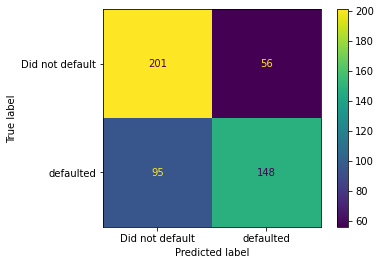

In [177]:
plot_confusion_matrix(clf_svm, Xtest_scaled, ytest, values_format='d', display_labels=['Did not default', 'defaulted'])

In [178]:
confusion_matrix(ytest, clf_svm.predict(Xtest_scaled))

array([[201,  56],
       [ 95, 148]], dtype=int64)

__NOTE:__ You can achieve the same results by simply creating a pipeline. But for some odd reason, it achieves just slightly different results.

In [216]:
from sklearn.pipeline import make_pipeline

SVM_pipeline = make_pipeline(StandardScaler(), SVC(random_state=42))
SVM_pipeline.fit(Xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [206]:
confusion_matrix(ytest, SVM_pipeline.predict(Xtest))

array([[202,  55],
       [100, 143]], dtype=int64)

In [184]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, clf_svm.predict(Xtest_scaled))

0.698

In [183]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_svm, X, y, cv=7)

array([0.6013986 , 0.63636364, 0.6048951 , 0.5979021 , 0.54195804,
       0.52982456, 0.55789474])

We can see that the SVM was good but it wasn't 'awesome'. So we're going to use GridSearch to optimize the parameters.

In [189]:
param_grid = {'C': [0.5, 1, 10, 100],
                'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}

optimal_params = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

optimal_params.fit(Xtrain_scaled, ytrain)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [190]:
clf_svm = SVC(random_state=42, C=100, gamma=0.001)
clf_svm.fit(Xtrain_scaled, ytrain)

SVC(C=100, gamma=0.001, random_state=42)

C:\Users\Monarch Eubanks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


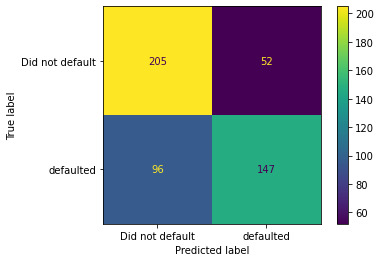

In [191]:
plot_confusion_matrix(clf_svm, Xtest_scaled, ytest, values_format='d', display_labels=['Did not default', 'defaulted'])

The gridsearch just slightly improved the dataset. The optimization didn't help much.

In conclusion we:
- Loaded the Data from a file
- Cleaned the data by removing missing values
- Downsampled
- Formatted the Data with an Encoder
- Scaled the Data
- Built a SVM for classification
- Optimized the SVM with a gridsearch
- Built, drew and interpretted the SVM.

# Decision Tree

The most widely used and powerful predictive modeling tools in data science for regression and classification.

A tree model is a set of "if-then-else" rules that are easy to understand and to implement. In contrast to linear and logistic regression, tress have the ability to discover hidden patterns corresponding to complex interactions in the data. However, unlike KNN or naive Bayes, simple tree models can be expressed in terms of predictor relationships that are easility interpretable.

As the tree grows bigger, the splitting rules become more detailed and the tree gradually shifts from identifying "big" rules that identiy real and reliable relationships in the data to "tiny" rules that reflect only noise. 

Avoid splitting a partition if a results usbpartition is too small or if a terminal leaf is too small. Don't split a partiion if the new partition does not "significantly" reduce the impurity. 


__PROS:__
- Can use both categorical and numerical data without much preprocessing

__CONS:__
- Prone to overfitting. Requires careful tuning.

## Single Decision Tree

__PARAMETERS:__

`criterion` 'gini' or 'entropy' as the criteria for the split.


`splitter` 'best' or 'random (NOTE: I've never encountered using random.


`max_depth` The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.
    
    
`min_samples_split` The minimum number of samples to split an internal node.


`min_samples_leaf` The minimum numer of samples required to be a leaf node.

`min_weight_fraction_leaf` one way to control the complexity of the tree and prevent overfitting. By setting a minimum requirement for the sum of instance weights in a leaf, the algorithm avoids creating nodes that capture very few instances, which may not be statistically significant.

`max_features` number of features to consider each time to make the split decision. Lets say that dimension of the data is 80 and the max_feature is 20, each time you need to find the split, you randomly select 20 features and use them to decide which one of the 20 is the best feature to use. When you go to the next node you will select randomly another 20 and so on. In addition even if you set the number to 20, if you go deep you will end up using all the features, but each time you limit the set to 20.

`random_state` Select a seed for a random state to retrieve the same results every time.


`max_leaf_nodes` Maximum number of leafs


`min_impurity_decrease` (VERY IMPORTANT PARAMETER)  A node will be split if this split induces a decrease of the impurity greater than or equal to this value.If min_impurity_decrease is set, tree stops to grow if any split can not decrease impurity more than min_impurity_decrease. It means there is no need to split more because your nodes will not be purer. What is the point of splitting then?


`class_weight` It is used to give weight to each class and tell which class deserves more weight. The class_weight=’balanced’ will also work, It just automatically adjusts weights according to the proportion of each class frequencies.In addition, it can be used while you are trying your model. Instead of adding or removing columns, by giving 0 to weight of that class, you can tell the model that ignore this feature.When I tried ‘balanced’ option, accuracy decreased. It means frequency in our classes are not balanced and to decrease the weight of less frequent ones by setting it as ‘balanced’ is ruining the model and it means that being less frequent doesn’t make a class less important in our data and the model.


`ccp_alpha` Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than will be chosen. By default, no pruning is performed. In the context of decision trees, pruning involves removing certain branches or nodes of the tree that do not contribute significantly to improving the model's performance on the validation or test set. The goal is to simplify the tree and prevent overfitting.

Alpha is the penalty for the quantity of leaves. A tree score is caclulated for the full tree. Each leaf is then cut and then another tree score is calculatled for the smaller tree. This process is repeated until the root node. The tree with the smallest tree score is then choosen. This will help reduce the variance-bias trade off.
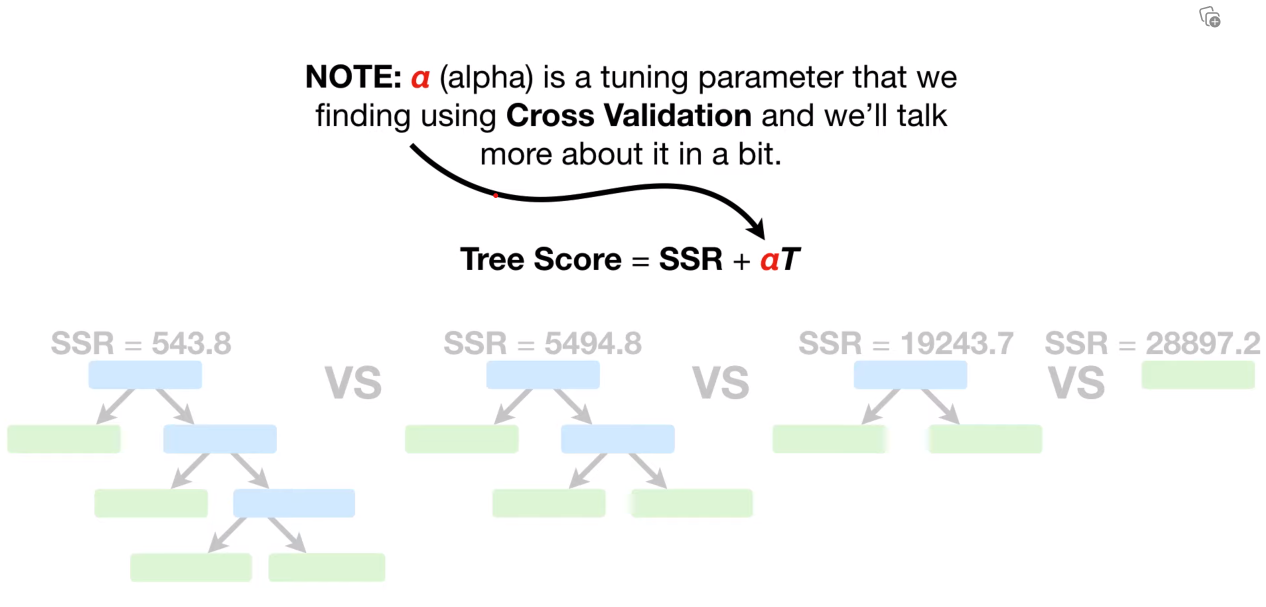

Pre-pruning (Early Stopping): Stop growing the tree once a certain condition is met, such as a maximum depth or a minimum number of samples in a leaf node.
Post-pruning (Cost-Complexity Pruning): Grow the tree to its maximum size and then selectively prune branches based on a cost-complexity criterion, which balances model complexity and accuracy.

In [73]:
"""Single Decision Tree"""
from sklearn.tree import DecisionTreeClassifier

loan3000 = pd.read_csv(LOAN3000_CSV)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False, dtype = int)
loan_cat = loan3000['purpose_'] #This method requires the catagory columns to be separated
loan_cat = pd.DataFrame(loan_cat)
loan3000[['debt_consolidation', 'credit_card', 'major_purchase', 'other',
       'home_improvement', 'small_business', 'medical']] = ohe.fit_transform(loan_cat)
loan3000 = loan3000.drop(columns='purpose_', axis=1)

predictors = ['dti', 'borrower_score', 'payment_inc_ratio',
       'debt_consolidation', 'credit_card', 'major_purchase', 'other',
       'home_improvement', 'small_business', 'medical']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy',
                                   min_impurity_decrease=0.003)
loan_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.003,
                       random_state=1)

In [74]:
classificationSummary(y, loan_tree.predict(X), 
                      class_names=loan_tree.classes_)

Confusion Matrix (Accuracy 0.6227)

         Prediction
  Actual  default paid off
 default      568      877
paid off      255     1300


### Single Decision Tree Case Study

In [518]:
"""Import Required Modules"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [519]:
df = pd.read_csv(r"\processed.cleveland.data", header=None)
df.head(3)

0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1

The columns don't have column names. This is why it's always important to review a document that explains the dataset (there are some unfortunate cases where it doesn't exist and you simply have to guess!). This dataset would be useless if we didn't know the column names, fortunately. The column names were provided from the website.

In [520]:
df.columns=['age', 'sex', 'cp','restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','hd']
df.head(3)

age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   

   slope   ca thal  hd  
0    3.0  0.0  6.0   0  
1    2.0  3.0  3.0   2  
2    2.0  2.0  7.0   1

We need to see if there is missing data.

In [521]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

We see that a majority of the columns are floats. 'ca' and 'thal' are objects which is suprising because the df.head(3) had shown float values. Let's investigate this issue.

We see that 'ca' and 'thal' has a question mark which forces the array to be an object. The question marks represent missing data.

In [522]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [523]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

We see that that this dataset doesn't have a lot of samples. Deleting these missing values can be tricky.

In [524]:
df.shape

(303, 14)

Fortunately, there are only 6 rows with missing data so we can delete these because this is only 2% of the data.

In [525]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [526]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
87   53.0  0.0  3.0   128.0  216.0  0.0      2.0    115.0    0.0      0.0   
166  52.0  1.0  3.0   138.0  223.0  0.0      0.0    169.0    0.0      0.0   
192  43.0  1.0  4.0   132.0  247.0  1.0      2.0    143.0    1.0      0.1   
266  52.0  1.0  4.0   128.0  204.0  1.0      0.0    156.0    1.0      1.0   
287  58.0  1.0  2.0   125.0  220.0  0.0      0.0    144.0    0.0      0.4   
302  38.0  1.0  3.0   138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  hd  
87     1.0  0.0    ?   0  
166    1.0    ?  3.0   0  
192    2.0    ?  7.0   1  
266    2.0  0.0    ?   2  
287    2.0    ?  7.0   0  
302    1.0    ?  3.0   0

Create a dataset that do not contain the missing values.

In [527]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
df_no_missing.shape

(297, 14)

In [528]:
df_no_missing.head(3)

age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   

   slope   ca thal  hd  
0    3.0  0.0  6.0   0  
1    2.0  3.0  3.0   2  
2    2.0  2.0  7.0   1

The math works out 303 (original df) - 6 (missing values ) = 297. Let's double check both columns.

In [529]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [530]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [531]:
X = df_no_missing.drop('hd', axis=1).copy()
X.head(3)

age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   

   slope   ca thal  
0    3.0  0.0  6.0  
1    2.0  3.0  3.0  
2    2.0  2.0  7.0

In [532]:
y = df_no_missing['hd'].copy()
y.head(3)

0    0
1    2
2    1
Name: hd, dtype: int64

Another reason why having a data explanation file is important - it is clear that the column datatypes are floats but the numbers represent a category. For example, 'sex' shouldn't be a number but rather 1 = male and 0 = female. Below are the values extracted from the data explanation file


- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
- restbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
- restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or 
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

We will need to 'onehotencode' the values. 

If we treated these values, 1,2,3 and 4, like continous data, then we would assume that 4, which means "asymptomatic", is more similar to 3, which means "non_anginal pain', than it is to 1 or 2 , which are otehr types of ches pain. That means the decision tree would be more likely to cluster the mpatients with 4s and 3s together than the patients with 4s and 1s together. In contrast, if we treat these numbers like categorical data, then we treat each one as a separate category that is no more or less similar to any of the other categories. Thus, the likelikhood of cluster patients with 4s and 3s is the same as clustering 4s with 1s and that approach is more reasonable.

Before we one hot encode. We need to confirm which column only contains values they're _supposed_ to have according to the documentation.

In [533]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [534]:
pd.get_dummies(X, columns=['cp']).head()

age  sex  restbp   chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  63.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0   
1  67.0  1.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0   
2  67.0  1.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0   
3  37.0  1.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0   
4  41.0  0.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0   

    ca thal  cp_1.0  cp_2.0  cp_3.0  cp_4.0  
0  0.0  6.0       1       0       0       0  
1  3.0  3.0       0       0       0       1  
2  2.0  7.0       0       0       0       1  
3  0.0  3.0       0       0       1       0  
4  0.0  3.0       0       1       0       0

In [535]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X_encoded.head(3)

age  sex  restbp   chol  fbs  thalach  exang  oldpeak   ca  cp_1.0  ...  \
0  63.0  1.0   145.0  233.0  1.0    150.0    0.0      2.3  0.0       1  ...   
1  67.0  1.0   160.0  286.0  0.0    108.0    1.0      1.5  3.0       0  ...   
2  67.0  1.0   120.0  229.0  0.0    129.0    1.0      2.6  2.0       0  ...   

   cp_4.0  restecg_0.0  restecg_1.0  restecg_2.0  slope_1.0  slope_2.0  \
0       0            0            0            1          0          0   
1       1            0            0            1          0          1   
2       1            0            0            1          0          1   

   slope_3.0  thal_3.0  thal_6.0  thal_7.0  
0          1         0         1         0  
1          0         1         0         0  
2          0         0         0         1  

[3 rows x 22 columns]

__IMPORTANT NOTE:__ One-Hot Encoding only converts columns with more than 2 categories. Since Sex, fbs, and exang only have 2 categories and only contain 0s and 1s to begin with, we do not need to do anything special.

In practice, we should use unique() to verify they contain 0s and 1s to confirm there are no errors.

You will see there are 5 different classes of heart disease. For this model, we only care if someone has heart disease or not. So we need to convert all numbers > 0 to 1.

In [536]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [537]:
y.shape

(297,)

In [538]:
y_not_zero_index = y > 0
y[y_not_zero_index ] = 1
y.unique()

array([0, 1], dtype=int64)

In [544]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_encoded, y, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(Xtrain, ytrain)

[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(0.05172413793103448, 0.375, 'exang <= 0.5\ngini = 0.

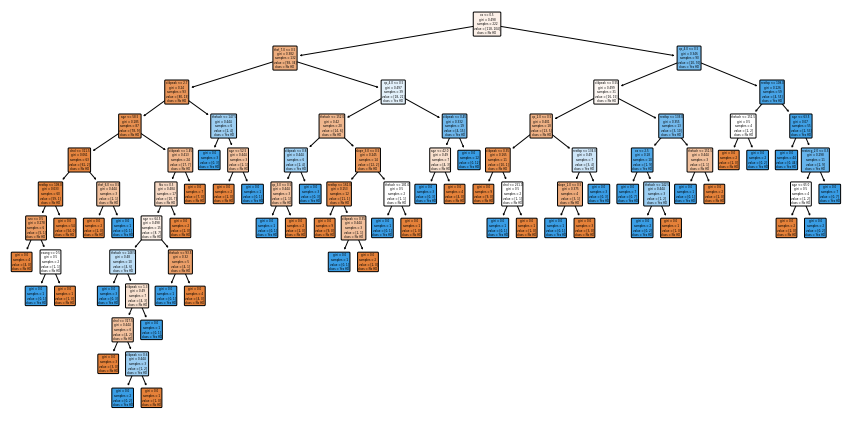

In [547]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns)

C:\Users\Monarch Eubanks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


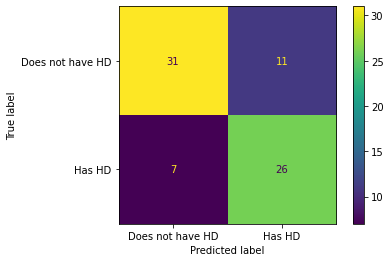

In [548]:
plot_confusion_matrix(clf_dt, Xtest, ytest, display_labels=["Does not have HD", "Has HD"])

__BONUS:__ An alternative method.

In [550]:
cm = confusion_matrix(ytest, clf_dt.predict(Xtest))
cm

array([[31, 11],
       [ 7, 26]], dtype=int64)

<AxesSubplot:>

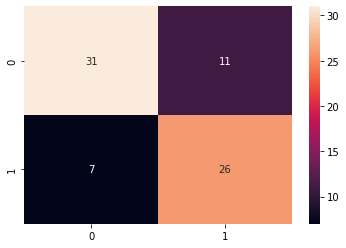

In [551]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [553]:
accuracy_score(ytest, clf_dt.predict(Xtest))

0.76

In [555]:
cross_val_score(clf_dt, X, y)

array([0.73333333, 0.86666667, 0.72881356, 0.71186441, 0.72881356])

It's possible that this model has overfit the data. Let's see if we can modify the values to make the accuracy better.

Decision Trees are notorious for being overfit to the Training Dataset, and there are a lot of parameters, like max_depth and min_samples, that are designed to reduce overfitting. However, pruning a tree with cost complexity pruing can simplify the whole process of finding a smaller tree that improves accuracy with the Testing Dataset.

First, let's extract the different values of alpha that are available for this tree and build a pruned tree for each value for alpha. NOTE: We omit the maximum value for alpha with ccp_alphas = ccp_alphas[:-1] because it would prune all the leaves, leaving us only a root instead of a tree.

In [561]:
path = clf_dt.cost_complexity_pruning_path(Xtrain, ytrain) #determine values for alpha
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum alpha for alpha

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(Xtrain, ytrain)
    clf_dts.append(clf_dt)

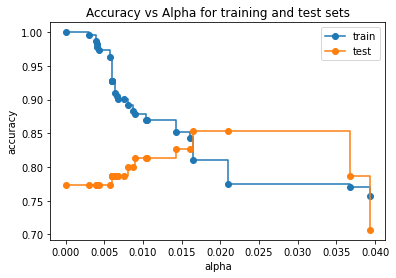

In [570]:
train_scores = [clf_dt.score(Xtrain, ytrain) for clf_dt in clf_dts]
test_scores = [clf_dt.score(Xtest, ytest) for clf_dt in clf_dts]

plt.subplots()
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs Alpha for training and test sets")
plt.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
plt.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
plt.legend()
plt.show()

When alpha increases, the size of the tree gets smaller. We can see that as we increase alpha, the accuracy of the testing data increases.

We can guess based on the graph that the alpha should be 0.016. 

Now let's see how the model has improved.

<AxesSubplot:xlabel='tree'>

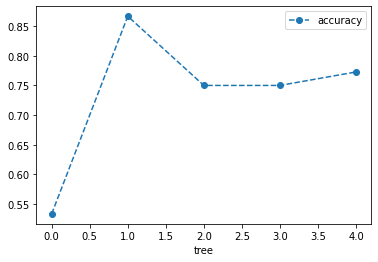

In [573]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, Xtrain, ytrain, cv=5)

df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [585]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
cross_val_score(clf_dt, Xtrain, ytrain, cv=5)

array([0.53333333, 0.86666667, 0.75      , 0.75      , 0.77272727])

In [586]:
clf_dt = DecisionTreeClassifier(random_state=42)
cross_val_score(clf_dt, Xtrain, ytrain, cv=5)

array([0.57777778, 0.86666667, 0.72727273, 0.65909091, 0.68181818])

We can see that ccp_alpha is sensitive to the dataset. So let's use cross_validation to find the optimal value for ccp_alpha.

<AxesSubplot:xlabel='alpha'>

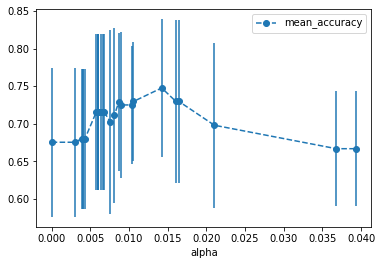

In [587]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, Xtrain, ytrain, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

We can see that we need to change the ccp_alpha closer to 0.014

In [589]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [591]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

In [592]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(Xtrain, ytrain)

C:\Users\Monarch Eubanks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


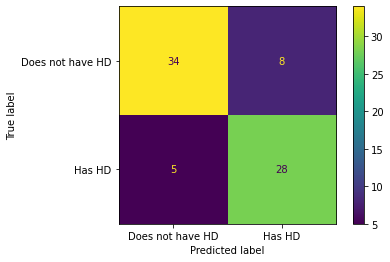

In [593]:
plot_confusion_matrix(clf_dt_pruned, Xtest, ytest, display_labels=["Does not have HD", "Has HD"])

Success, pruning has optimized the predictibility.

[Text(0.5769230769230769, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.3076923076923077, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.15384615384615385, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.07692307692307693, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(0.46153846153846156, 0.375, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(0.38461538461538464, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(0.5384615384615384, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(0.8461538461538461, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 Text(0.7692307692307693, 0.375, 'oldpeak <= 0.5

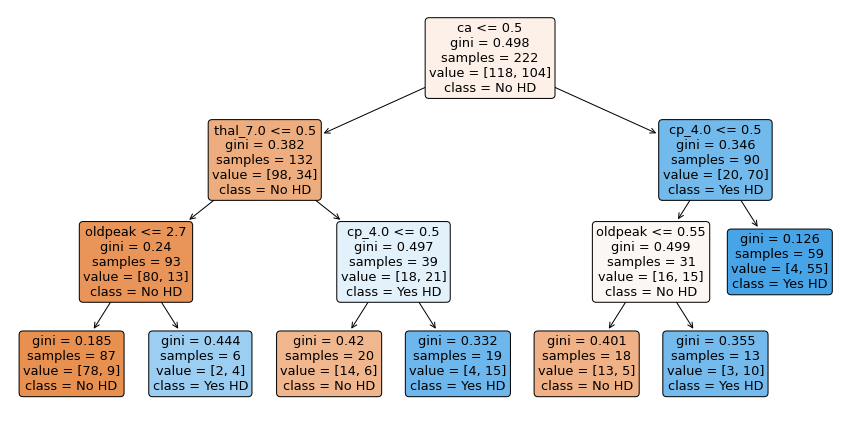

In [594]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns)

We can see that a smaller tree increases the accuracy.

## Bagging Classifier

__PARAMETERS:__

`base_estimator` The base estimator to fit on random subsets of the dataset.

`n_estimators` - The number of base estimators in the ensemble.

`max_samples` If bootstrap is True, the number of samples to draw from X to train each base estimator.

`max_features` number of features to consider each time to make the split decision. Lets say that dimension of the data is 80 and the max_feature is 20, each time you need to find the split, you randomly select 20 features and use them to decide which one of the 20 is the best feature to use. When you go to the next node you will select randomly another 20 and so on. In addition even if you set the number to 20, if you go deep you will end up using all the features, but each time you limit the set to 20.

`bootstrap` default = True

`bootstrap_features`  Whether features are drawn with replacement.

`oob_score`Whether to use out-of-bag samples to estimate the generalization score.
    Only available if bootstrap=True.

`warm_start` - When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. (computation optimizer)

`n_jobs`paralellization to increase computation speed. Only use after the accuracy has been fully optimized.

`random_state` Select a seed for a random state to retrieve the same results every time.

`verbose` The level of detail in the printed output may vary depending on the specific algorithm and library being used.


In [75]:
"""Bagging Classifier"""

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8)

bag.fit(X,y)

classificationSummary(y, bag.predict(X), 
                      class_names=loan_tree.classes_)

Confusion Matrix (Accuracy 0.9987)

         Prediction
  Actual  default paid off
 default     1443        2
paid off        2     1553


In [78]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
bag.fit(Xtrain, ytrain)
classificationSummary(ytest, bag.predict(Xtest), 
                      class_names=loan_tree.classes_)

Confusion Matrix (Accuracy 0.5840)

         Prediction
  Actual  default paid off
 default      204      141
paid off      171      234


## Random Forest

Decision Trees work great with data used to create them but not flexible when comes to classifying new samples.

What should you do -
You should calculate two metrics - R-square and MAE/MSE.
Reason being - for an end-user/business person, MAE would be useful e.g. saying that model's prediction will be ~250$ away from the correct value on an average.

Challenge with MAE/MSE is that it doesn't say if it is good model unless you have an idea of the underlying data. e.g. Creating two models on pricing data of 2 different city - Boston/Tokyo and the MSE is 1000/
1500.
You can't conclude that the former is a better model from this data.
R-square helps here.

Adjusted R-square (Another regression metrics) - If your feature set is fixed, then you need not check this metrics. It was devised to fix an issue with R-square when the feature set is different for different models.

__PARAMETERS:__

`n_estimators` - number of trees in the forest.

`criterion` 'gini' or 'entropy' as the criteria for the split.

`max_depth` The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.
    

    
`min_samples_split` The minimum number of samples to split an internal node.


`min_samples_leaf` The minimum numer of samples required to be a leaf node.

`min_weight_fraction_leaf` one way to control the complexity of the tree and prevent overfitting. By setting a minimum requirement for the sum of instance weights in a leaf, the algorithm avoids creating nodes that capture very few instances, which may not be statistically significant.

`max_features` number of features to consider each time to make the split decision. Lets say that dimension of the data is 80 and the max_feature is 20, each time you need to find the split, you randomly select 20 features and use them to decide which one of the 20 is the best feature to use. When you go to the next node you will select randomly another 20 and so on. In addition even if you set the number to 20, if you go deep you will end up using all the features, but each time you limit the set to 20.



`max_leaf_nodes` Maximum number of leafs


`min_impurity_decrease` (VERY IMPORTANT PARAMETER)  A node will be split if this split induces a decrease of the impurity greater than or equal to this value.If min_impurity_decrease is set, tree stops to grow if any split can not decrease impurity more than min_impurity_decrease. It means there is no need to split more because your nodes will not be purer. What is the point of splitting then?

`bootstrap` default = True

`oob_score`Whether to use out-of-bag samples to estimate the generalization score.
    Only available if bootstrap=True.

`n_jobs`paralellization to increase computation speed. Only use after the accuracy has been fully optimized.

`random_state` Select a seed for a random state to retrieve the same results every time.

`verbose` The level of detail in the printed output may vary depending on the specific algorithm and library being used.

`warm_start` - When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. (computation optimizer)

`class_weight` It is used to give weight to each class and tell which class deserves more weight. The class_weight=’balanced’ will also work, It just automatically adjusts weights according to the proportion of each class frequencies.In addition, it can be used while you are trying your model. Instead of adding or removing columns, by giving 0 to weight of that class, you can tell the model that ignore this feature.When I tried ‘balanced’ option, accuracy decreased. It means frequency in our classes are not balanced and to decrease the weight of less frequent ones by setting it as ‘balanced’ is ruining the model and it means that being less frequent doesn’t make a class less important in our data and the model.

`ccp_alpha` Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than will be chosen. By default, no pruning is performed.

`max_samples` If bootstrap is True, the number of samples to draw from X to train each base estimator.

### Random Forest Classifier

In [79]:
"""Random Forest Classifer"""

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X,y)

classificationSummary(y, rf.predict(X), 
                      class_names=loan_tree.classes_)

Confusion Matrix (Accuracy 1.0000)

         Prediction
  Actual  default paid off
 default     1445        0
paid off        0     1555


In [403]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [80]:
loan_tree.fit(Xtrain, ytrain)
bag.fit(Xtrain, ytrain)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(random_state=0)

In [81]:
classificationSummary(ytest, loan_tree.predict(Xtest), 
                      class_names=loan_tree.classes_)

Confusion Matrix (Accuracy 0.6093)

         Prediction
  Actual  default paid off
 default      166      179
paid off      114      291


In [82]:
classificationSummary(ytest, bag.predict(Xtest), 
                      class_names=loan_tree.classes_)

Confusion Matrix (Accuracy 0.5933)

         Prediction
  Actual  default paid off
 default      208      137
paid off      168      237


In [83]:
classificationSummary(ytest, rf.predict(Xtest), 
                      class_names=loan_tree.classes_)

Confusion Matrix (Accuracy 0.5867)

         Prediction
  Actual  default paid off
 default      200      145
paid off      165      240


### Random Forest Regression

__PARAMETERS:__

`n_estimators` - number of trees in the forest.

`criterion` 'gini' or 'entropy' as the criteria for the split.

`max_depth` The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.
    

    
`min_samples_split` The minimum number of samples to split an internal node.


`min_samples_leaf` The minimum numer of samples required to be a leaf node.

`min_weight_fraction_leaf` one way to control the complexity of the tree and prevent overfitting. By setting a minimum requirement for the sum of instance weights in a leaf, the algorithm avoids creating nodes that capture very few instances, which may not be statistically significant.

`max_features` number of features to consider each time to make the split decision. Lets say that dimension of the data is 80 and the max_feature is 20, each time you need to find the split, you randomly select 20 features and use them to decide which one of the 20 is the best feature to use. When you go to the next node you will select randomly another 20 and so on. In addition even if you set the number to 20, if you go deep you will end up using all the features, but each time you limit the set to 20.



`max_leaf_nodes` Maximum number of leafs


`min_impurity_decrease` (VERY IMPORTANT PARAMETER)  A node will be split if this split induces a decrease of the impurity greater than or equal to this value.If min_impurity_decrease is set, tree stops to grow if any split can not decrease impurity more than min_impurity_decrease. It means there is no need to split more because your nodes will not be purer. What is the point of splitting then?

`bootstrap` default = True

`oob_score`Whether to use out-of-bag samples to estimate the generalization score.
    Only available if bootstrap=True.

`n_jobs`paralellization to increase computation speed. Only use after the accuracy has been fully optimized.

`random_state` Select a seed for a random state to retrieve the same results every time.

`verbose` The level of detail in the printed output may vary depending on the specific algorithm and library being used.

`warm_start` - When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. (computation optimizer)

`class_weight` It is used to give weight to each class and tell which class deserves more weight. The class_weight=’balanced’ will also work, It just automatically adjusts weights according to the proportion of each class frequencies.In addition, it can be used while you are trying your model. Instead of adding or removing columns, by giving 0 to weight of that class, you can tell the model that ignore this feature.When I tried ‘balanced’ option, accuracy decreased. It means frequency in our classes are not balanced and to decrease the weight of less frequent ones by setting it as ‘balanced’ is ruining the model and it means that being less frequent doesn’t make a class less important in our data and the model.

`ccp_alpha` Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than will be chosen. By default, no pruning is performed.

`max_samples` If bootstrap is True, the number of samples to draw from X to train each base estimator.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [421]:
HOUSE_CSV = "\\house_sales.csv"
house = pd.read_csv(HOUSE_CSV, sep='\t')

subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']

print(house[subset].head(2))

   AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
1      300805.0           2400     9373       3.00         6          7
2     1076162.0           3764    20156       3.75         4         10


In [423]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

X = house[predictors]
y = house[outcome]

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240754
 SqFtLot: -0.06046682065306008
 Bathrooms: -19442.840398321146
 Bedrooms: -47769.955185214094
 BldgGrade: 106106.9630789811


In [425]:
from sklearn.metrics import r2_score, mean_squared_error

fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted) #compare the fitted values to the target values
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


In [386]:
from sklearn.ensemble import RandomForestRegressor

In [388]:
rmr = RandomForestRegressor()
rmr.fit(house[predictors], house[outcome])

RandomForestRegressor()

In [389]:
fitted_rmr = rmr.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted_rmr))
r2 = r2_score(house[outcome], fitted_rmr) #compare the fitted values to the target values
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 92350
r2: 0.9426


In [420]:
from sklearn.model_selection import train_test_split

In [424]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [426]:
from sklearn.model_selection import cross_val_score
cross_val_score(house_lm, X, y, cv=5)

array([0.58911205, 0.54780865, 0.52725397, 0.48046398, 0.55373978])

In [429]:
from sklearn.model_selection import cross_val_score
cross_val_score(rmr, X, y, cv=5)

array([0.54094927, 0.58926945, 0.62477205, 0.57173013, 0.57322309])

# Manifold Learning (Placeholder)

__TO BE UDPATED AT A LATER TIME__

Rarely used for anything more than simple qualitiative visualization of high-dimensional data.

advantage over PCA is their ability to preserve nonlinear relationships with data. This method tends to be used only after data has been explored with PCA.

Helps understand the relationship between high dimensional datapoints.

# K-Means Clustering Unsupervised Learning Method
Clustering is a technique to divide data into different groups, where the records in each group are similar to one another. A goal of clustering is to identify significant meaningful groups of data. The groups can be used directly, analyzed in more depth, or passed as a feature or an outcome to a predictive regression or classification model.

KNN is a supervised learning algorithm mainly used for classification problems, whereas K-Means (aka K-means clustering) is an unsupervised learning algorithm. K in K-Means refers to the number of clusters, whereas K in KNN is the number of nearest neighbors (based on the chosen distance metric).

__CONS:__

- limited to linear cluster boundaries

- Only assumes the cluster is circular

- It is slow for large data sets since each individual points is analyzed to find the best cluster.

- The nonprobabilistc nature of k-means and its use of simple distance-from-cluster -center to assign cluster membership leads to poor performance for many real-world situations. 

- Number of clusters must be known or assumed in advance.

__HYPERPARAMETERS:__

`n_clusters` number of clusters


`init` 'k-means++' or 'random'. 'k-means++' selects an initial cluster, 'random' assigns a random initial cluster

`n_init` Number of time the k-means algorithm will be run with different
    centroid seeds. By default, the algorithm will run 10 times. The best result of all the runs of the algorithm is chosen and used as the final output.
    
`max_iter` Maximum quanitty of interations to find the minimum SSR.

`tol` The tolerance of how close to find the 'zero derivative' for minimum SSR. A tolerance let's us know how close to zero is close enough. For example, there's no difference betwen 0.00001 and 0.00000000000000001 unless we set a tolerance.

`verbose` displays some progress information during hte training process.

`random_state`

`copy_X` - when copy_X=True (default behavior), the model works with a copy of the input data. Modifying the original data after fitting the model does not affect the model's coefficients. However, when copy_X=False, the model works directly with the input data, and modifications to the original data can affect the model. It's important to note that using copy_X=True is generally safer, and modifying the original data after fitting the model is not recommended. The example is provided to illustrate the behavior of the copy_X parameter, but in practice, you would typically use the default value (copy_X=True).


`algorithm` default="auto"
    K-means algorithm to use. The classical EM-style algorithm is "full".
    The "elkan" variation is more efficient on data with well-defined
    clusters, by using the triangle inequality. However it's more memory
    intensive due to the allocation of an extra array of shape
    (n_samples, n_clusters).

__NOTE:__ Again, you must know in advance an inclination of the clusters but can find the best clusters using an elbow plot. The best number of clusters is identified when the reduction of variation tends to go down slower or baseline.
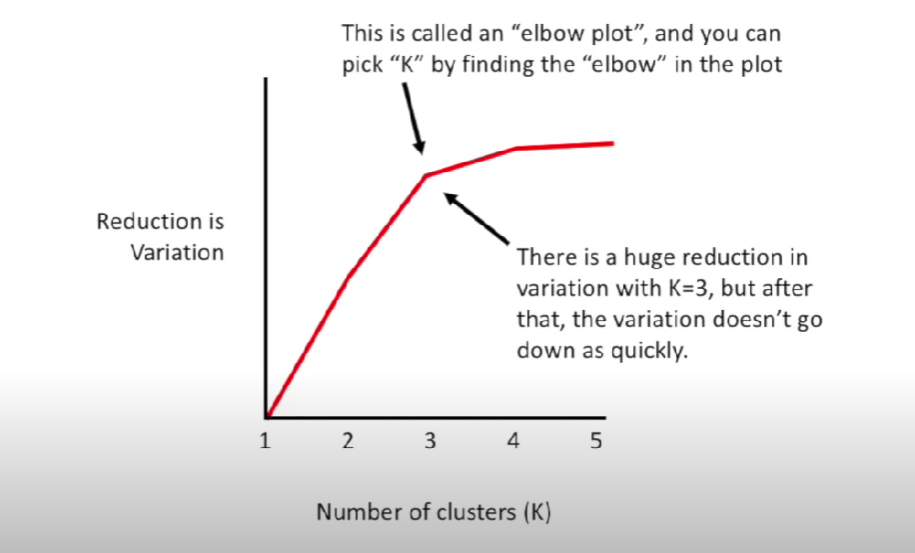

### KMeans Case Study

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [39]:
customer_data = pd.read_csv(r"\Mall_Customers.csv")
customer_data.head(3)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6

In [40]:
customer_data.shape

(200, 5)

In [41]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
customer_data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [43]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


KMeans can only use categorical values. Customer ID has an int value but it is a primary key/catagorical value so we are not going to use this feature. 

In [46]:
X = customer_data.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### Choose the number of clusters

What is the optimum number of clusters to use for this dataset?

WCSS --> Within Clusters SUM of Squares. Finds the the distance between the centroid and clusters datapoints. 

We'll use the elbow method using the WCSS.

In [49]:
""""Find WCSS value for the different number of clusters"""

WCSS = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

5 is the correct number of clusters since the variation is starting to level off after this point.

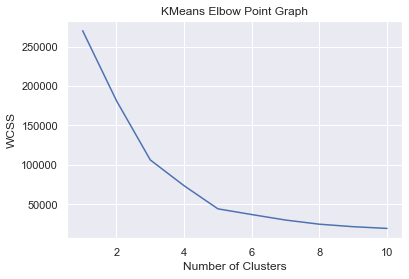

In [50]:
"""plot an elbow graph"""

sns.set()
plt.plot(range(1,11), WCSS)
plt.title('KMeans Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We now create a KMeans clustering model. 

__NOTE:__ This is an unsupervised machine learning model so this method will assign numerical labels for each cluster starting from 0. Five clusters will have clusters labeled as 0, 1, 2, 3, 4.

In [52]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing all the Clusters

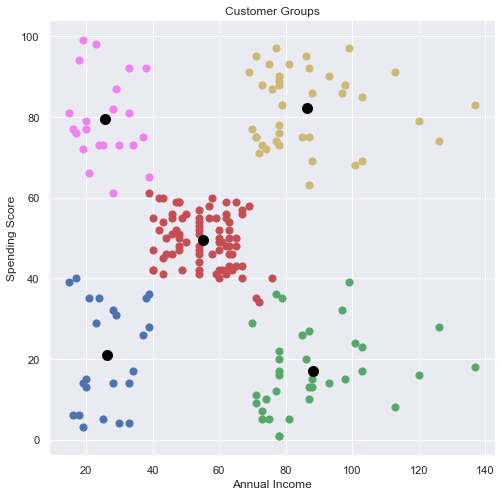

In [62]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='g', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='r', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='y', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='b', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

__NOTE:__ This dataset already has values that are visually well separated. You can see that KMeans has successfully identified the five different clusters.

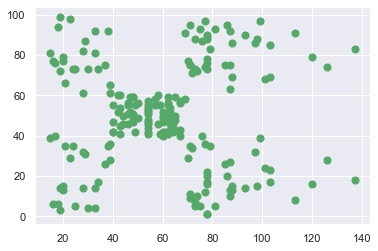

In [66]:
plt.scatter(X[:, 0], X[:,1], s=50, c='g')

# Gaussian Mixture Model

__HYPERPARAMTERS:__

`n_components` - number of mixture components. This must be known ahead of time.


`covariance_type` controls the degrees of freedom in the shape of each cluster, It is essential to set this carefully for any given problem. The default covariance_type='diag' means that the size of the cluster along each dimension can be set independently, with the resulting ellipse contrained to align with the axes. A simpler and faster model is 'spherical' which contrains the shape of the cluster such that all dimensionals are equal. A more complicated and computationally expsnive model is 'full' which allows the cluster to be modeled with an ellipse with arbitrary orientation.

`tol` The convergence thresold

`reg_covar` Add regularization to assure are covariance marices are all positive

`max_iter` The number of iterations to perform

`n_init` The number initializations. Initialization in the context of machine learning refers to the process of setting the initial values of the model parameters before training.  

`init_params` The method to initialize the weights. 'randomly' will help computation speed.

`weights_init` Initialization weights on n_components.

`means_init` Intiializaton means on n_components.

`precsions_init` Initialization precision on n_components. 

`random_state`

`warm_start`

`verbose`

`verbose_interval`

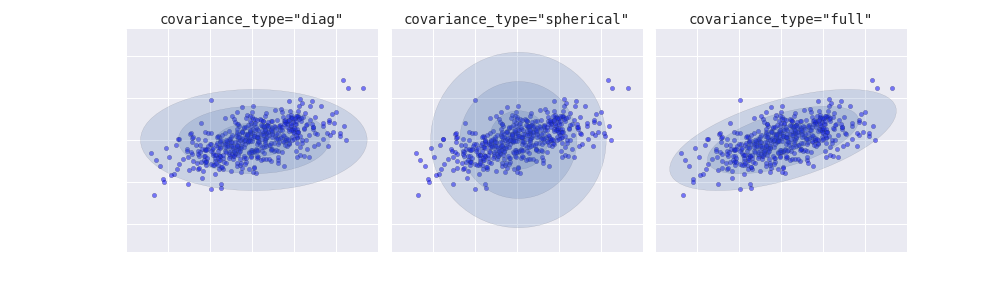

In [67]:
customer_data = pd.read_csv(r"\Mall_Customers.csv")
customer_data.head(3)
X = customer_data.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

You can see the GaussianMixture works the same as KMeans under the hood.

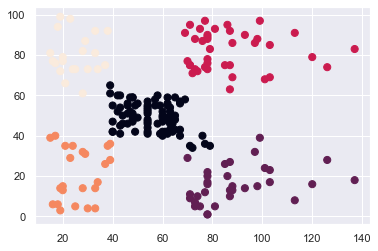

In [93]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:,1], s=50, c=labels)

We can see that GMM contains a probalistic model so it's possible to find the probability for the cluster assignments which is something KMeans is not capable of doing.

In [98]:
probs = gmm.predict_proba(X)
probs[45:50].round(3)

array([[0.821, 0.   , 0.007, 0.015, 0.157],
       [0.973, 0.   , 0.   , 0.023, 0.004],
       [0.888, 0.   , 0.   , 0.112, 0.001],
       [0.602, 0.   , 0.   , 0.398, 0.   ],
       [0.602, 0.   , 0.   , 0.398, 0.   ]])

# Kernel Density Estimation

PLACEHOLDER